In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the report data from the csv file.
df = pd.read_csv("GBR-results-reports.csv")
df.head(3)

Gruppe                            Aufgabe  Report Nummer   
0   GBR1              Übung 5 Posix RW-Lock              1  \
1   GBR1              Übung 5 Posix RW-Lock              2   
2   GBR1  Übung 4 Interprozesskommunikation              1   

   AddressSanitizer:Segmentation Fault  AddressSanitizer:bad-free   
0                                  0.0                        0.0  \
1                                  0.0                        0.0   
2                                  0.0                        0.0   

   AddressSanitizer:double-free   
0                           0.0  \
1                           0.0   
2                           0.0   

   AddressSanitizer:dynamic-stack-buffer-overflow   
0                                             0.0  \
1                                             0.0   
2                                             0.0   

   AddressSanitizer:global-buffer-overflow   
0                                      0.0  \
1                                      0.0   
2                                      0.0   

   AddressSanitizer:heap-buffer-overflow   
0                                    0.0  \
1                                    0.0   
2                                    0.0   

   AddressSanitizer:heap-use-after-free  ...   
0                                   0.0  ...  \
1                                   0.0  ...   
2                                   0.0  ...   

   static-analyzer:unused parameter 'args'   
0                                      0.0  \
1                                      0.0   
2                                      0.0   

   static-analyzer:unused parameter 'argv'   
0                                      0.0  \
1                                      0.0   
2                                      0.0   

   static-analyzer:unused parameter 'signal'   
0                                        0.0  \
1                                        0.0   
2                                        0.0   

   static-analyzer:unused variable 'frei'   
0                                     0.0  \
1                                     0.0   
2                                     0.0   

   static-analyzer:unused variable 'mutex'   
0                                      0.0  \
1                                      0.0   
2                                      0.0   

   static-analyzer:unused variable 'next'   
0                                     0.0  \
1                                     0.0   
2                                     0.0   

   static-analyzer:unused variable 'r'   
0                                  0.0  \
1                                  0.0   
2                                  0.0   

   static-analyzer:unused variable 'result'   
0                                       0.0  \
1                                       0.0   
2                                       0.0   

   static-analyzer:variable 'result' is uninitialized when used here   
0                                                0.0                  \
1                                                0.0                   
2                                                0.0                   

   static-analyzer:variable 'shm_fd' is uninitialized when used here  
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  

[3 rows x 219 columns]

In [23]:
error_counts = df.iloc[:,3:].sum(axis=1).astype('int64')
set(df.loc[(df['Report Nummer'] == 1),'Aufgabe'])


{'Blatt 5 Aufg 2',
 'Rw Lock',
 'Uebung 2 Prozessliste',
 'Übung 0 Stack',
 'Übung 0 Stack Live',
 'Übung 1 Ringbuffer',
 'Übung 2 Fork',
 'Übung 2 Prozessliste',
 'Übung 2 Prozesstabelle',
 'Übung 2.3 Prozessliste',
 'Übung 2.5 Prozesserzeugung',
 'Übung 3 Pthreads',
 'Übung 4 Broken Pipe',
 'Übung 4 Interprozesskommunikation',
 'Übung 5 Posix RW-Lock',
 'Übung 5 Posix RW-Lock 2',
 'Übung 5 Shared Memory und Semaphore'}

In [24]:
# There are also some projects which are not relevant to the data.
drop_indices = np.isin(df['Aufgabe'],('Übung 5 Posix RW-Lock 2', 'Übung 0 Stack', 'Übung 0 Stack Live'))
df2 = df[~drop_indices]

rename_mapping = {
    'Übung 2 Prozesstabelle': 'Übung 2 Prozessliste',
    'Übung 2.3 Prozessliste': 'Übung 2 Prozessliste',
    'Uebung 2 Prozessliste': 'Übung 2 Prozessliste',
    'Blatt 5 Aufg 2': 'Übung 5 Shared Memory und Semaphore',
    'Rw Lock': 'Übung 5 Posix RW-Lock',
    'Übung 2.5 Prozesserzeugung': 'Übung 2 Fork'
}

# make the non-standard project names match with the rest of the data
df2.loc[df2['Aufgabe'].isin(rename_mapping.keys()), 'Aufgabe'] = df2['Aufgabe'].map(rename_mapping)

set(df2.loc[(df2['Report Nummer'] == 1),'Aufgabe'])

{'Übung 1 Ringbuffer',
 'Übung 2 Fork',
 'Übung 2 Prozessliste',
 'Übung 3 Pthreads',
 'Übung 4 Broken Pipe',
 'Übung 4 Interprozesskommunikation',
 'Übung 5 Posix RW-Lock',
 'Übung 5 Shared Memory und Semaphore'}

In [25]:
report_amounts = df2.groupby(['Gruppe', 'Aufgabe'])['Report Nummer'].transform('count')
normalized_report_numbers = (df2['Report Nummer'] - 1) / (report_amounts - 1)
report_amounts[report_amounts == 1]
# these rows have only 1 report, that means we cannot see how the amount of errors changed after the students saw their report, because the students didn't change anything after they saw the report
# conveniently, the normalization sets the value of these rows to nan, so we can drop the rows with .dropna() later. (x - 1) / (1 - 1) = (x-1) / 0 = nan

556     1
557     1
560     1
561     1
748     1
1049    1
1050    1
1494    1
1495    1
1511    1
1541    1
Name: Report Nummer, dtype: int64

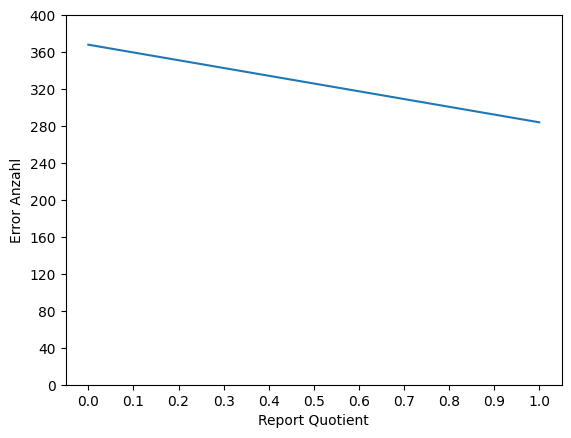

In [26]:
df3 = df2[['Gruppe', 'Aufgabe']].copy(deep=True)
df3['Error Anzahl'] = error_counts
df3['Report Quotient'] = normalized_report_numbers.round(decimals=2)
df3.dropna(inplace=True)

error_sum = df3.groupby('Report Quotient')['Error Anzahl'].sum()

sns.lineplot(x=df3['Report Quotient'], y=error_sum)
plt.yticks(np.linspace(0,400,11))
plt.xticks(np.linspace(0,1,11))
plt.show()

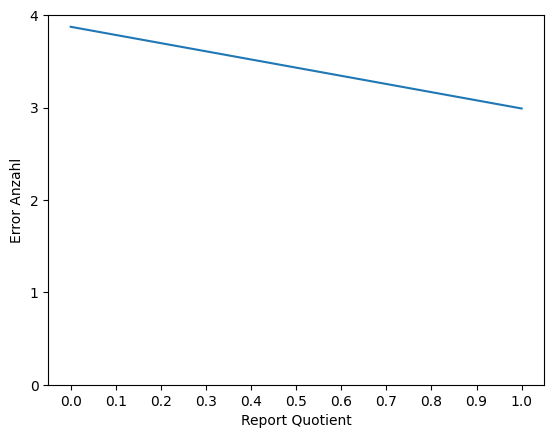

In [37]:
df3 = df2[['Gruppe', 'Aufgabe']].copy(deep=True)
df3['Error Anzahl'] = error_counts
df3['Report Quotient'] = normalized_report_numbers.round(decimals=2)
df3.dropna(inplace=True)

error_sum = df3.groupby('Report Quotient')['Error Anzahl'].mean()

sns.lineplot(x=df3['Report Quotient'], y=error_sum)
plt.yticks(np.linspace(0,4,5))
plt.xticks(np.linspace(0,1,11))
plt.show()

<Figure size 640x480 with 0 Axes>

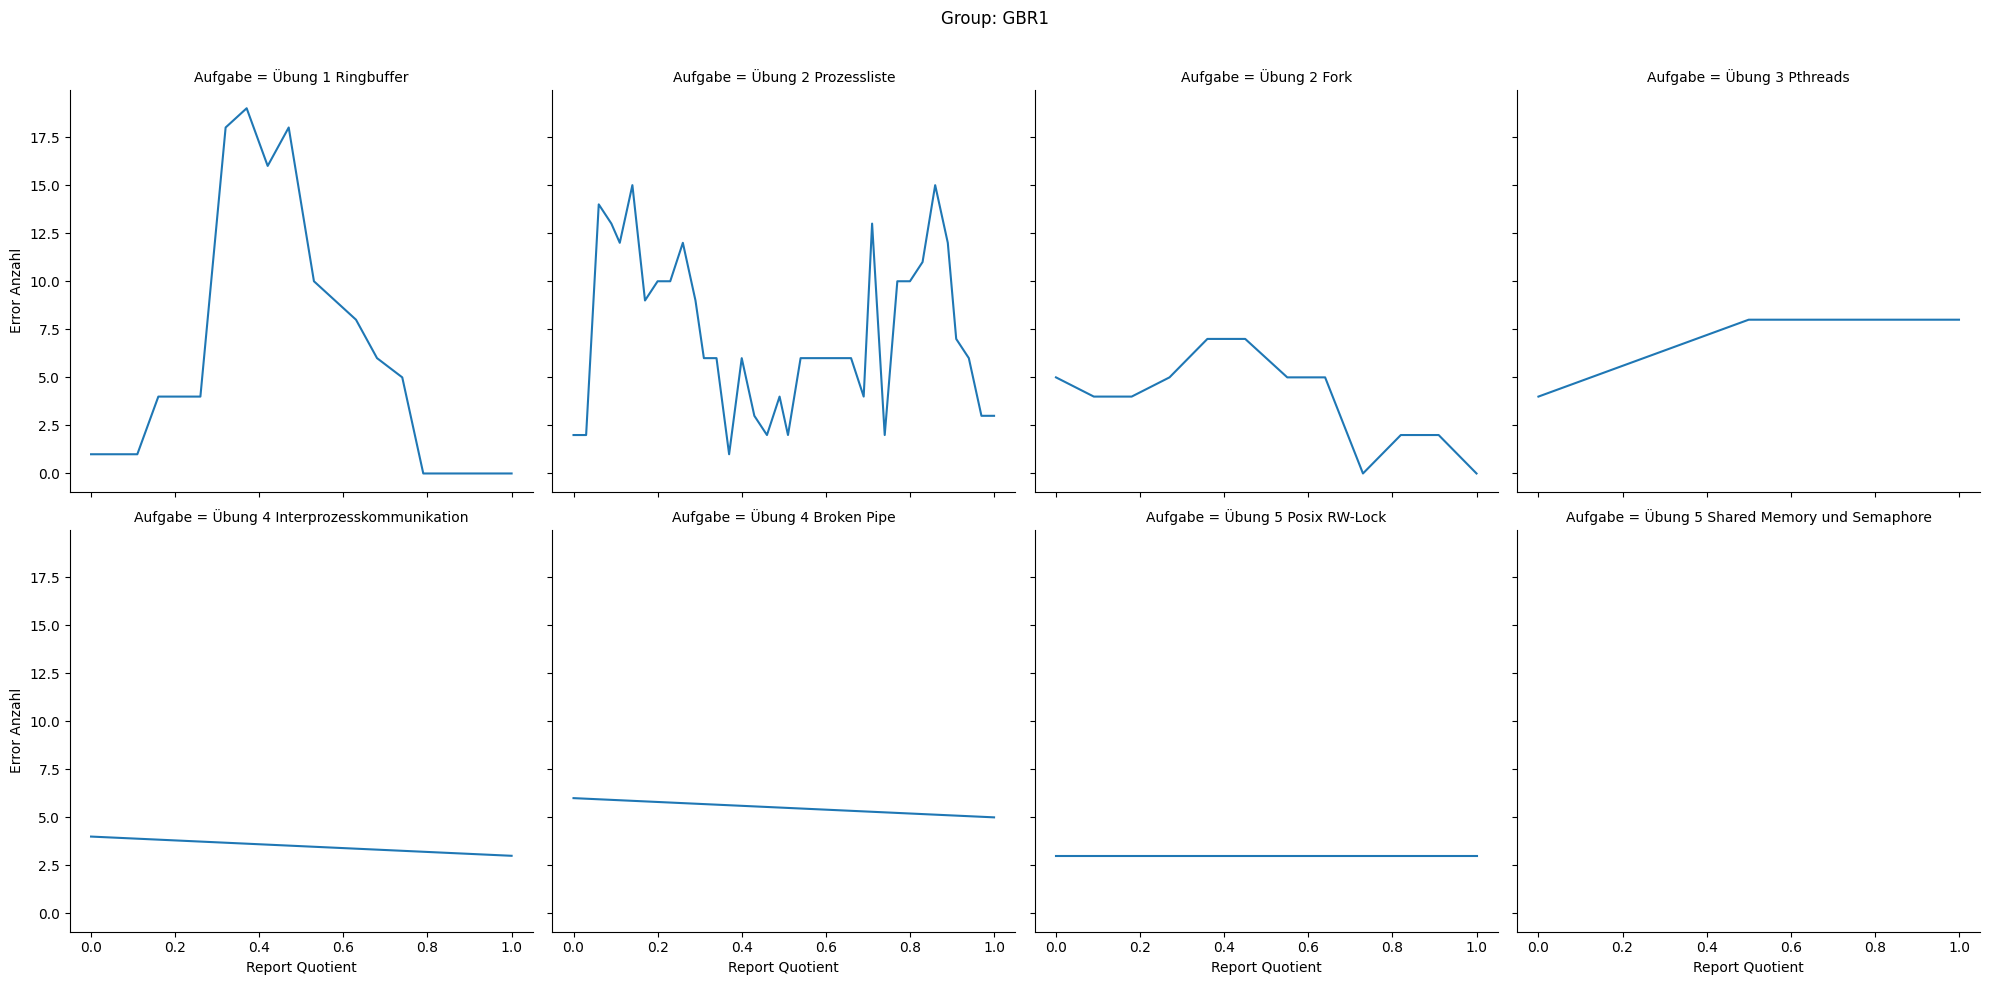

<Figure size 640x480 with 0 Axes>

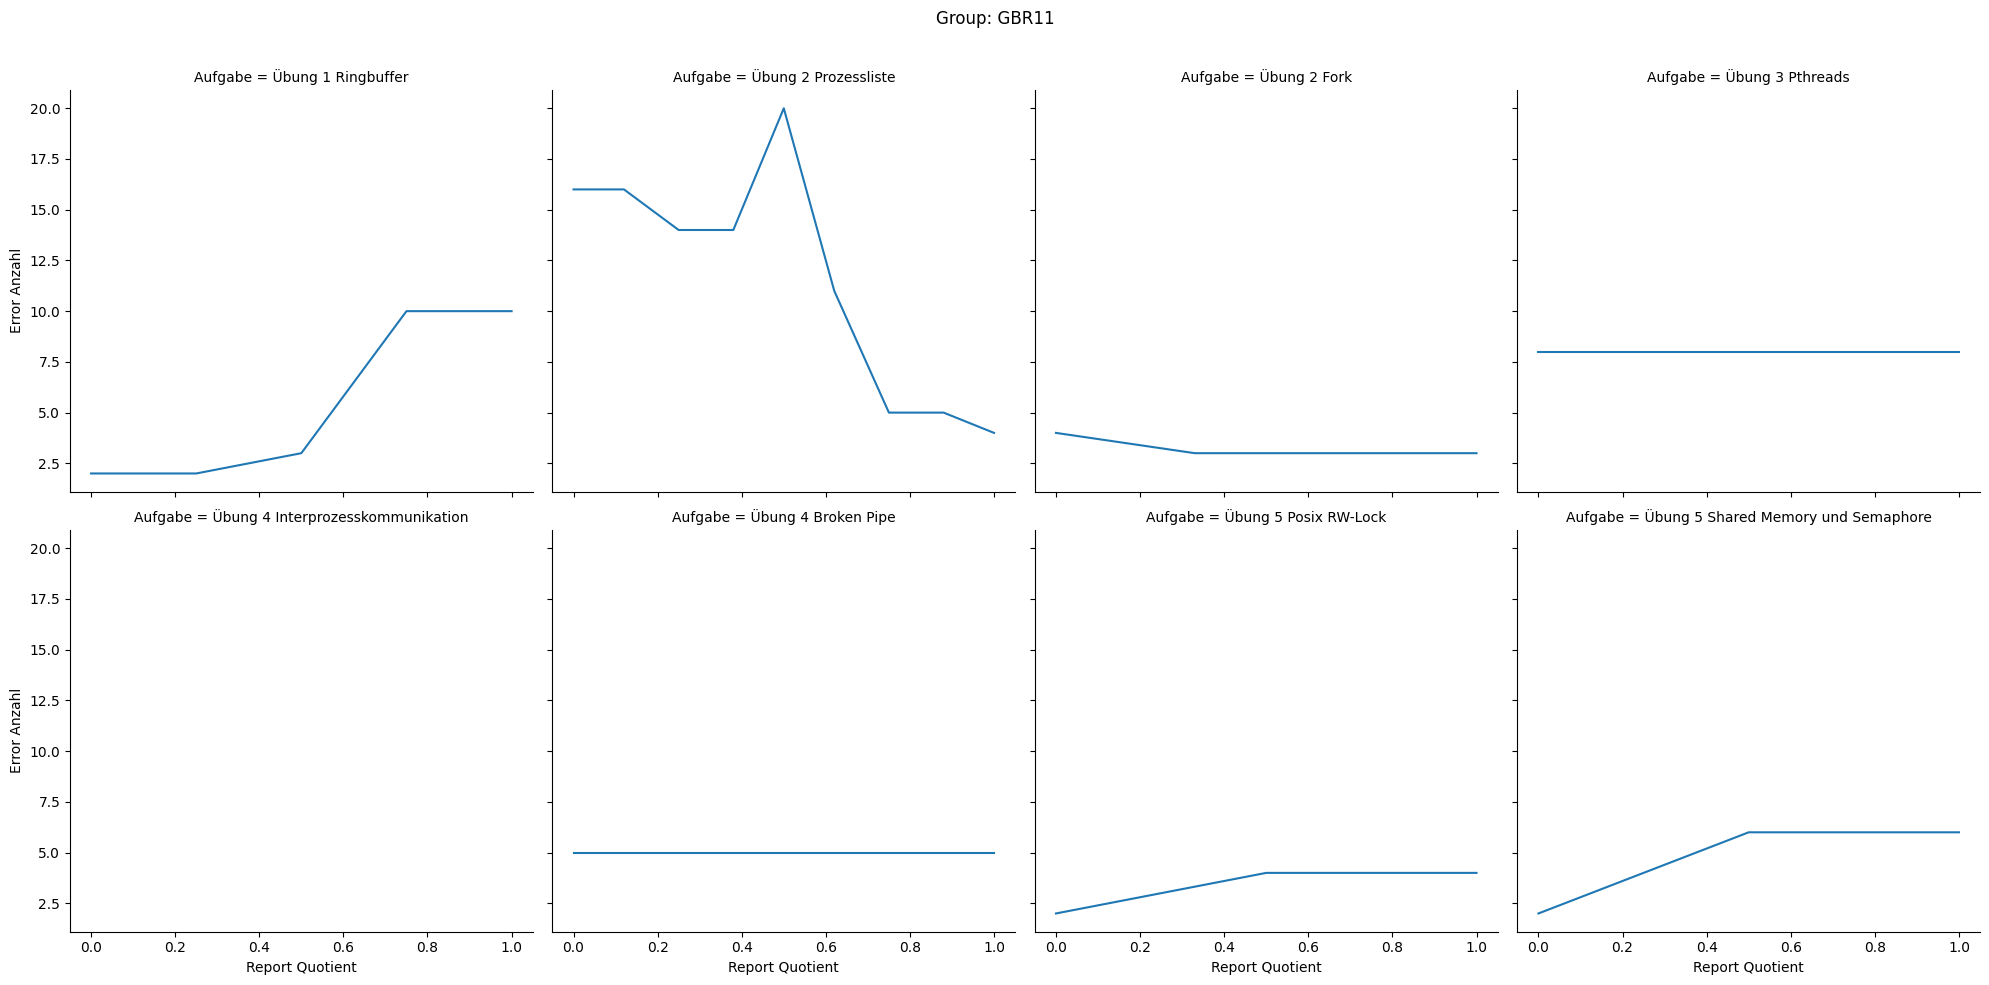

<Figure size 640x480 with 0 Axes>

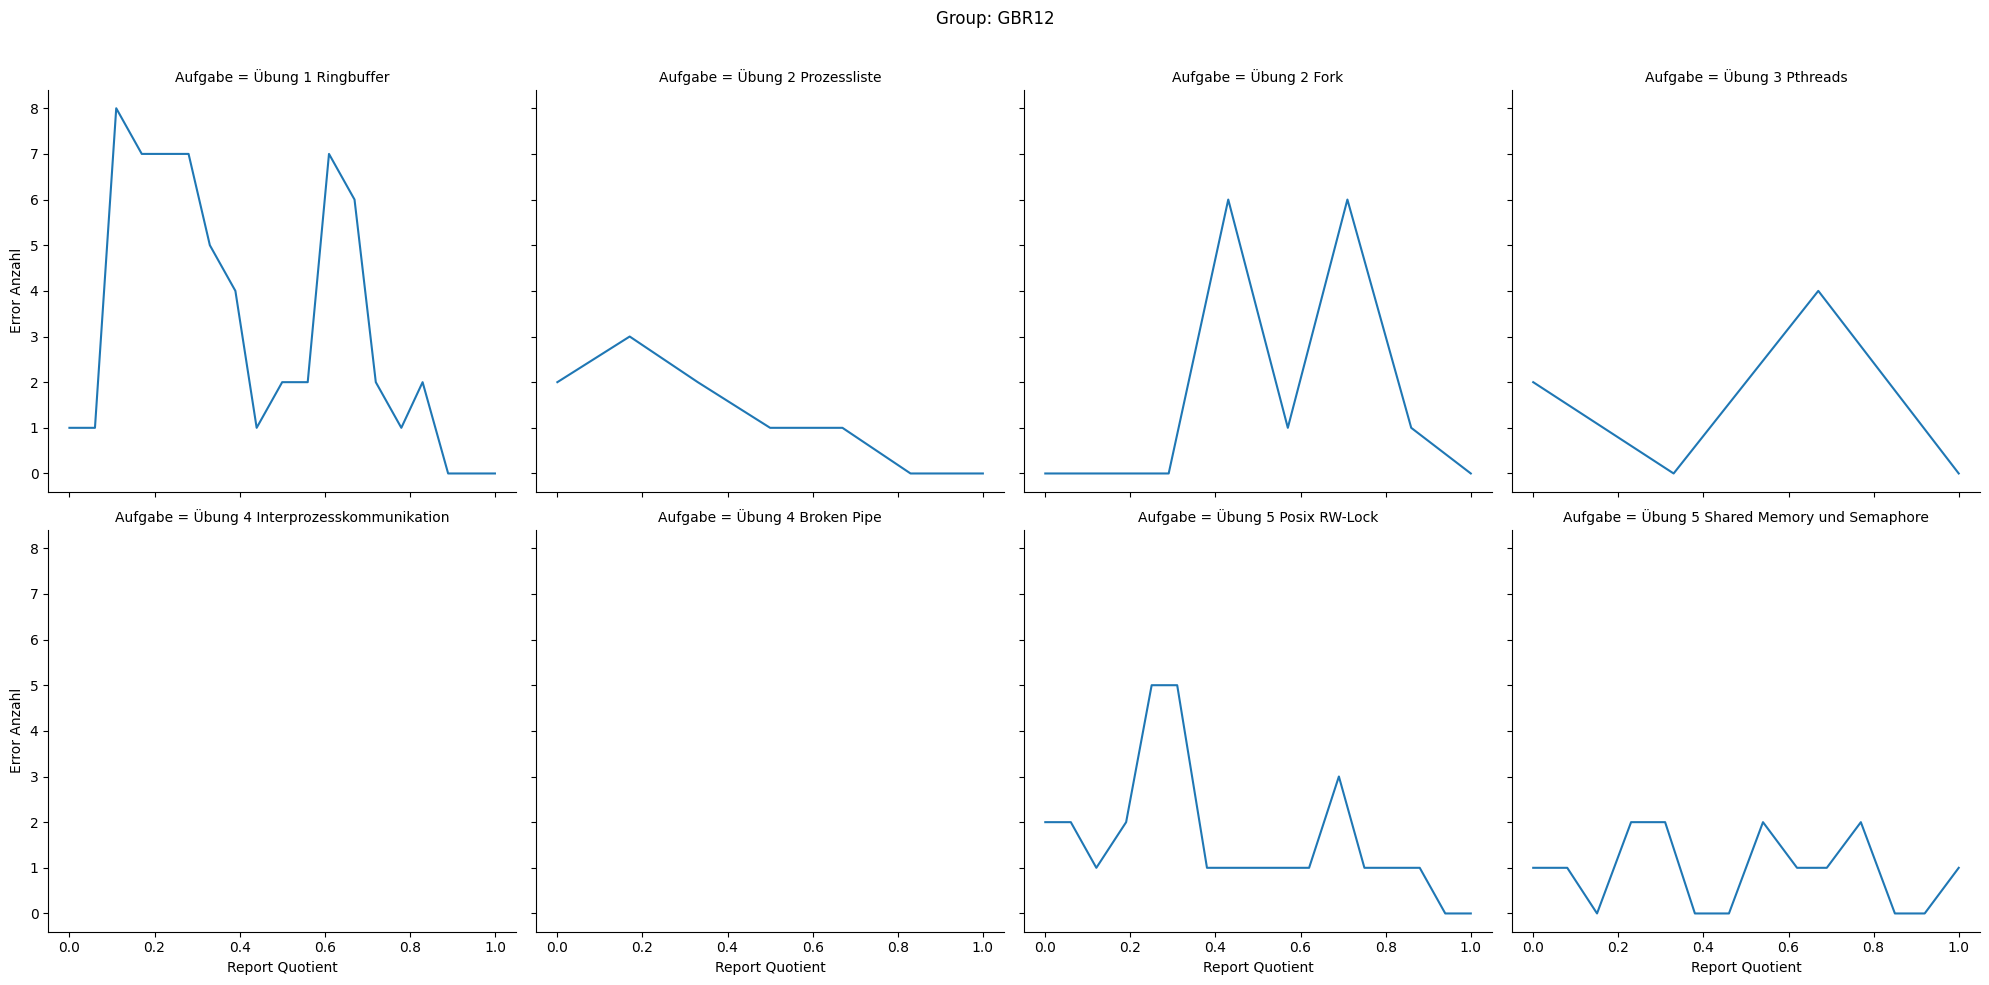

<Figure size 640x480 with 0 Axes>

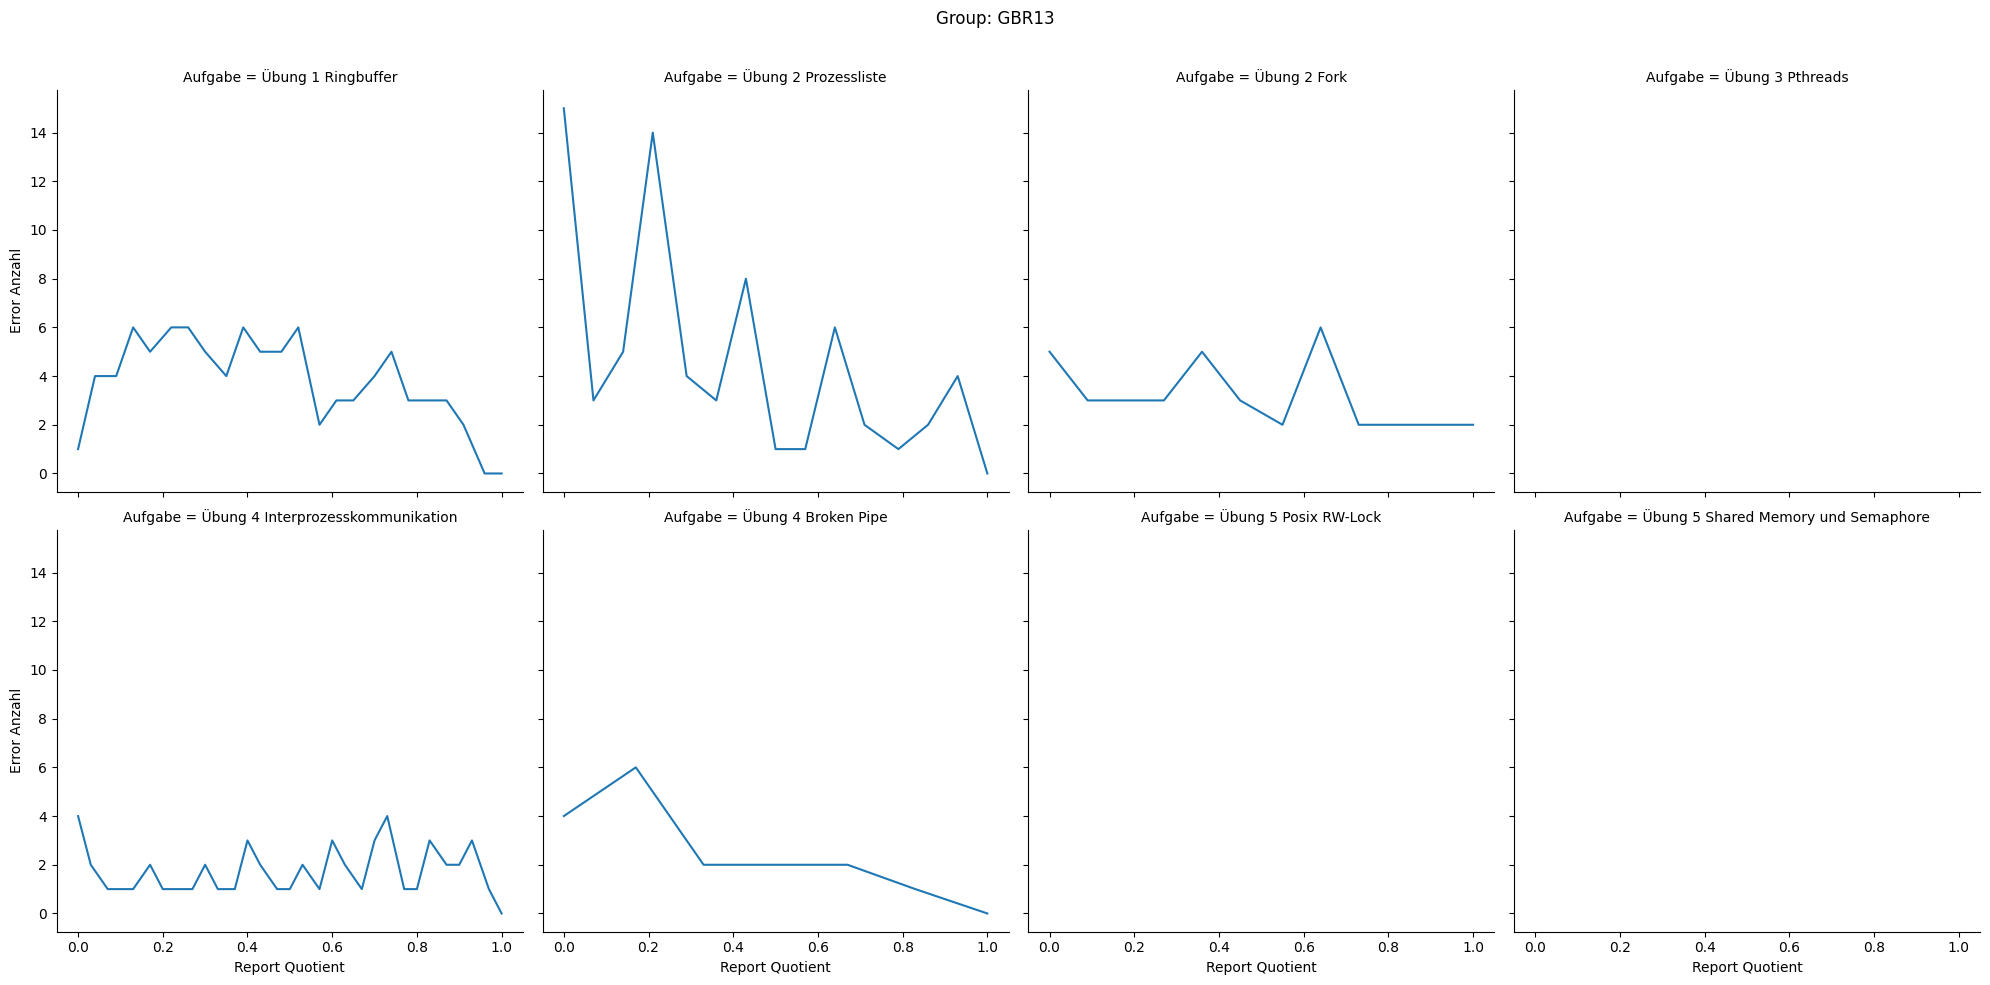

<Figure size 640x480 with 0 Axes>

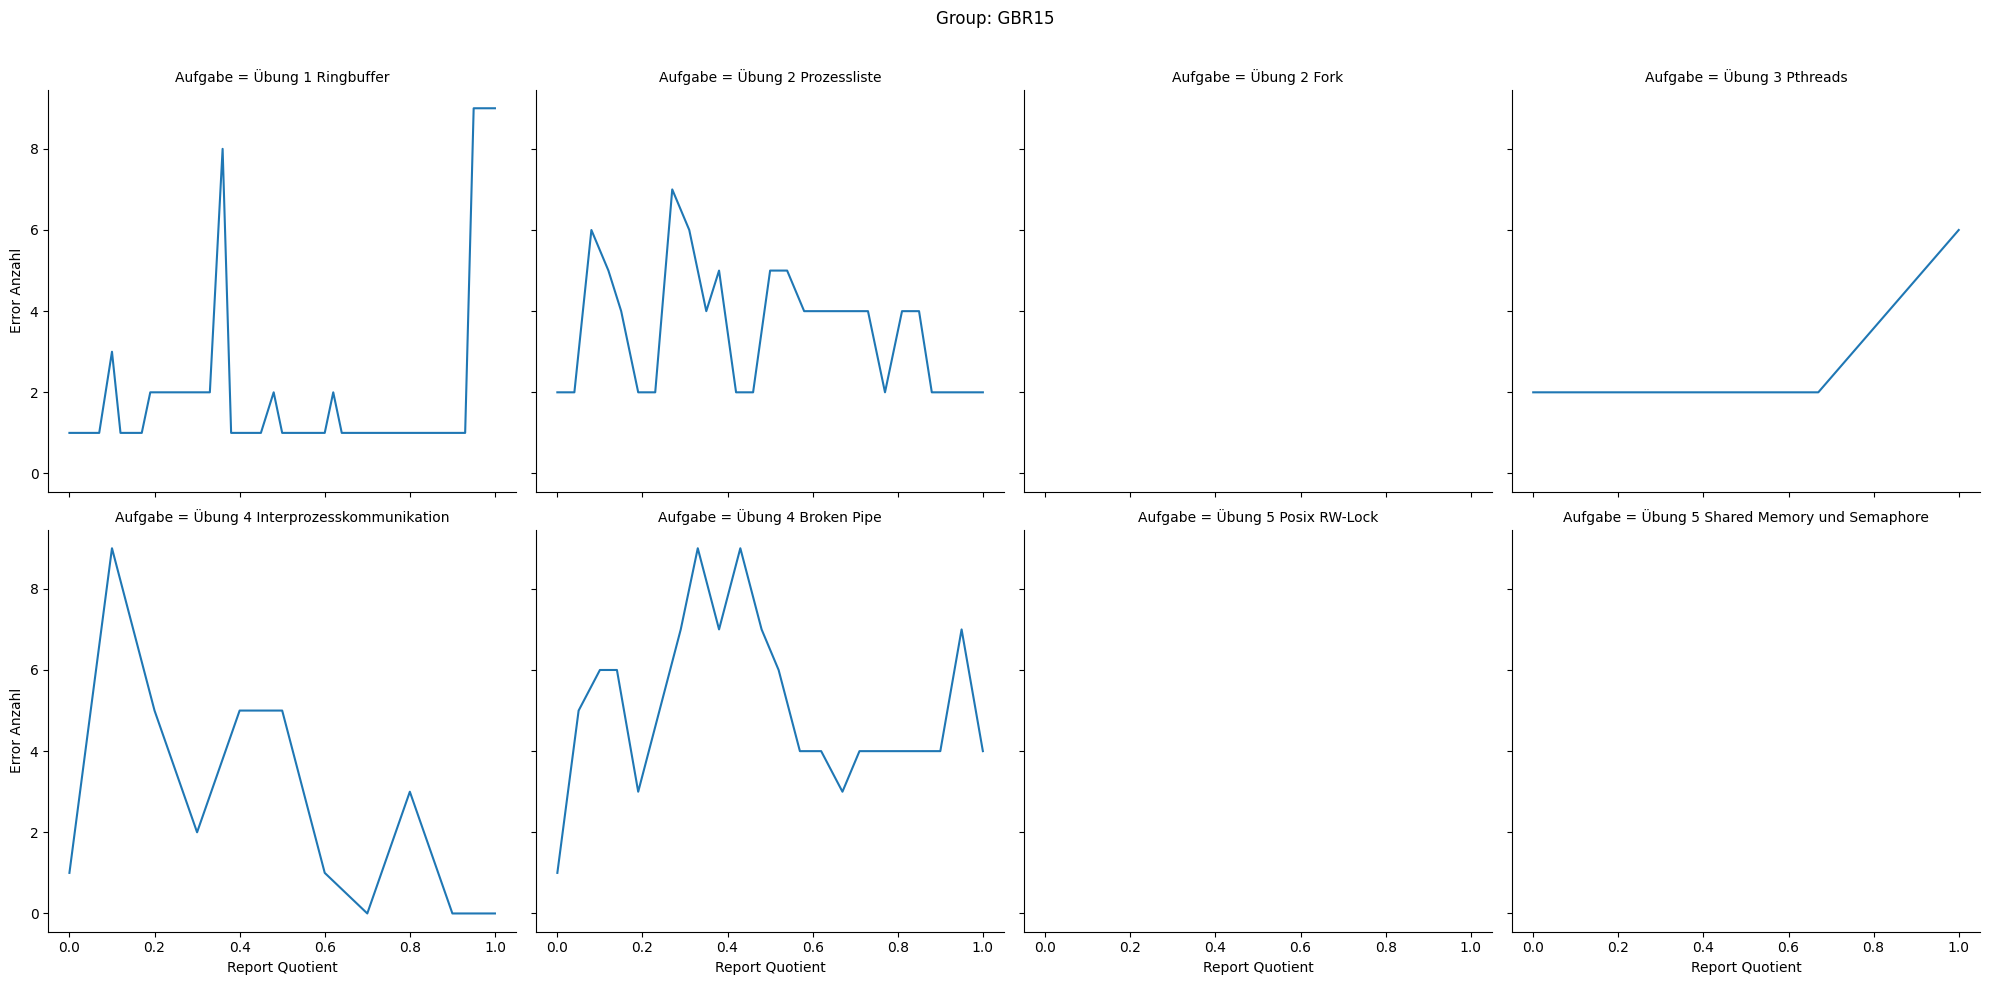

<Figure size 640x480 with 0 Axes>

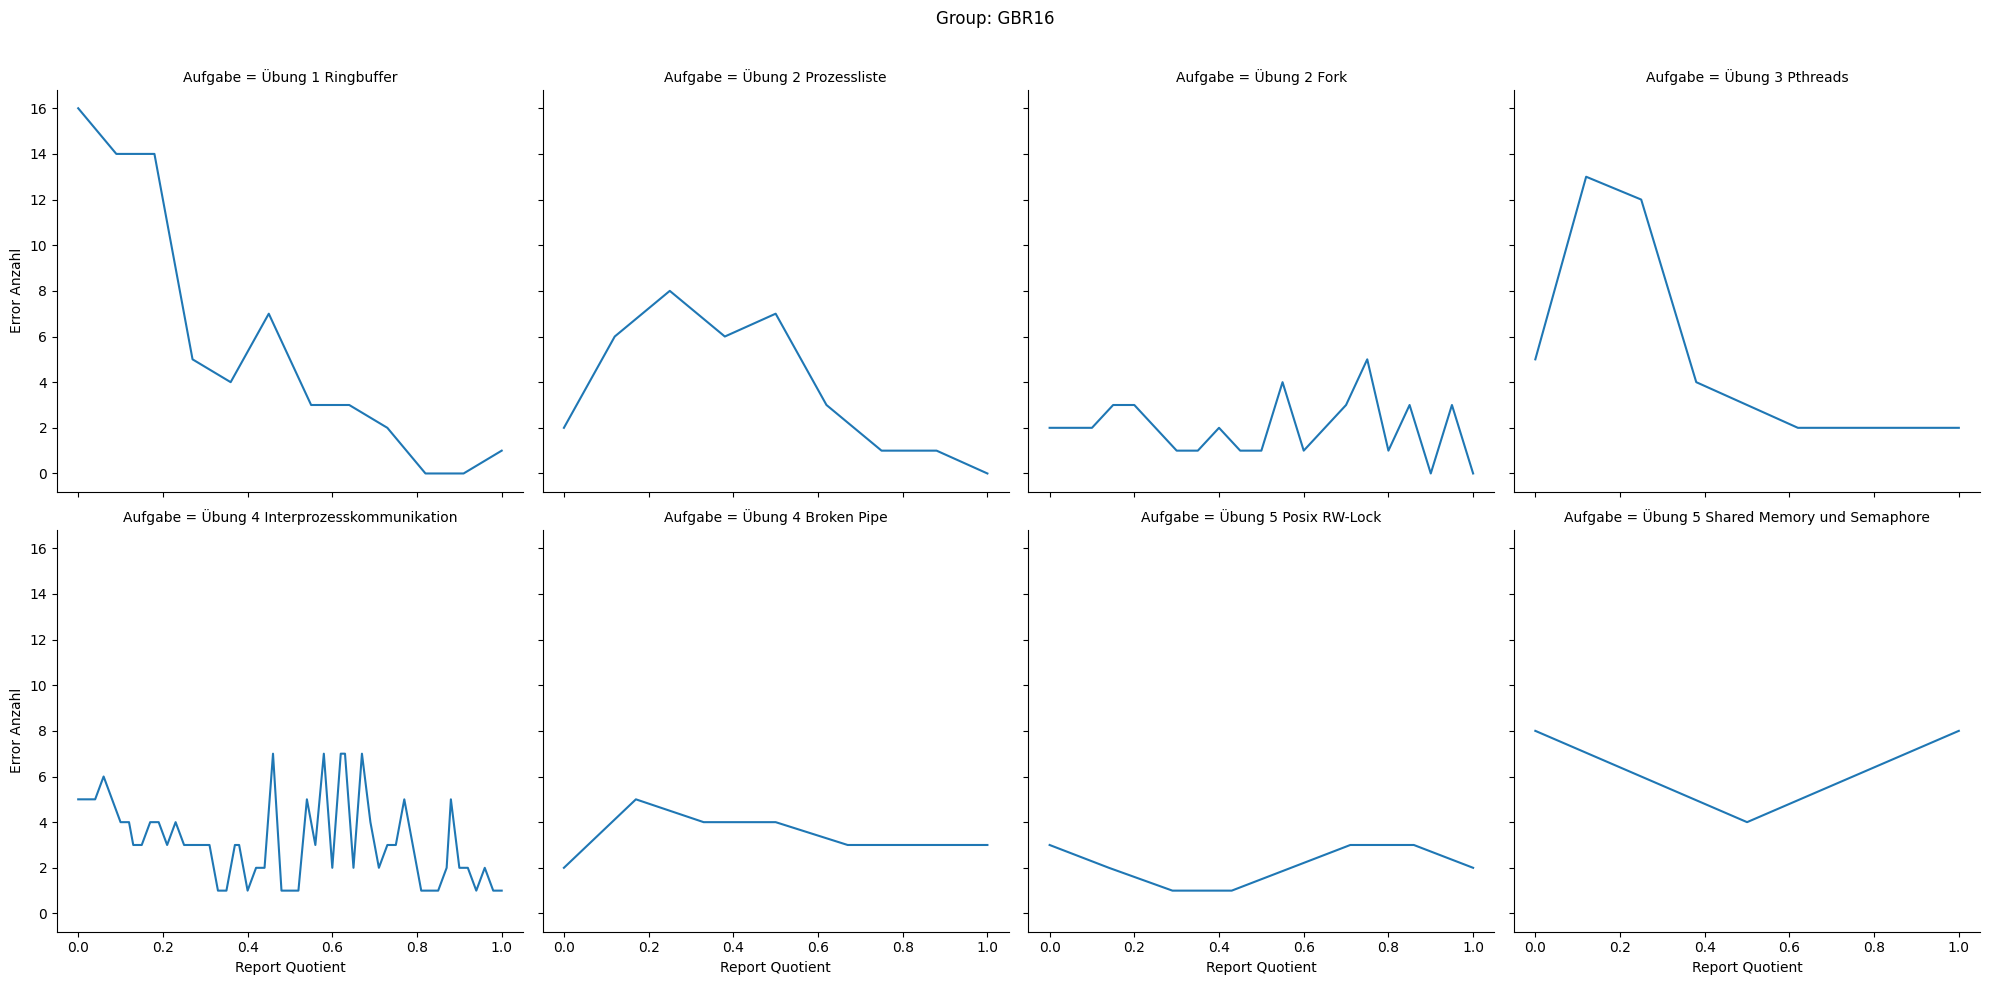

<Figure size 640x480 with 0 Axes>

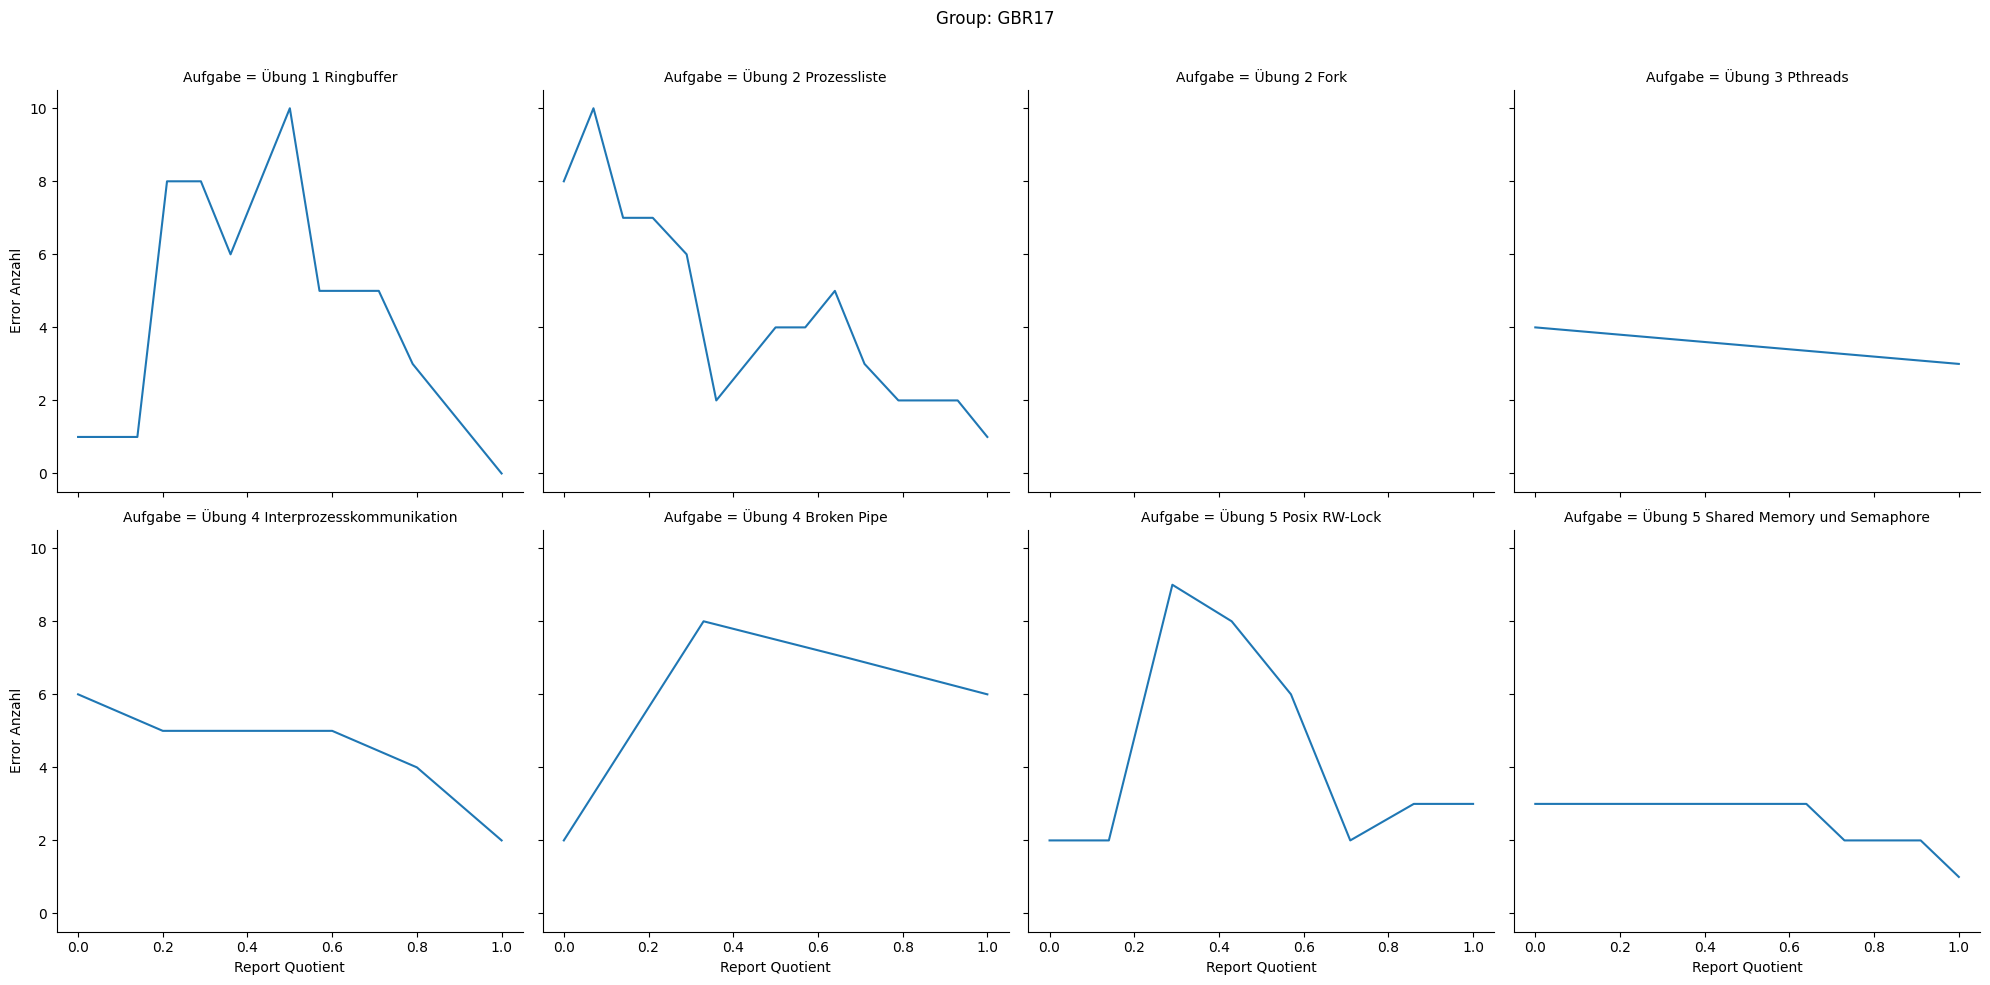

<Figure size 640x480 with 0 Axes>

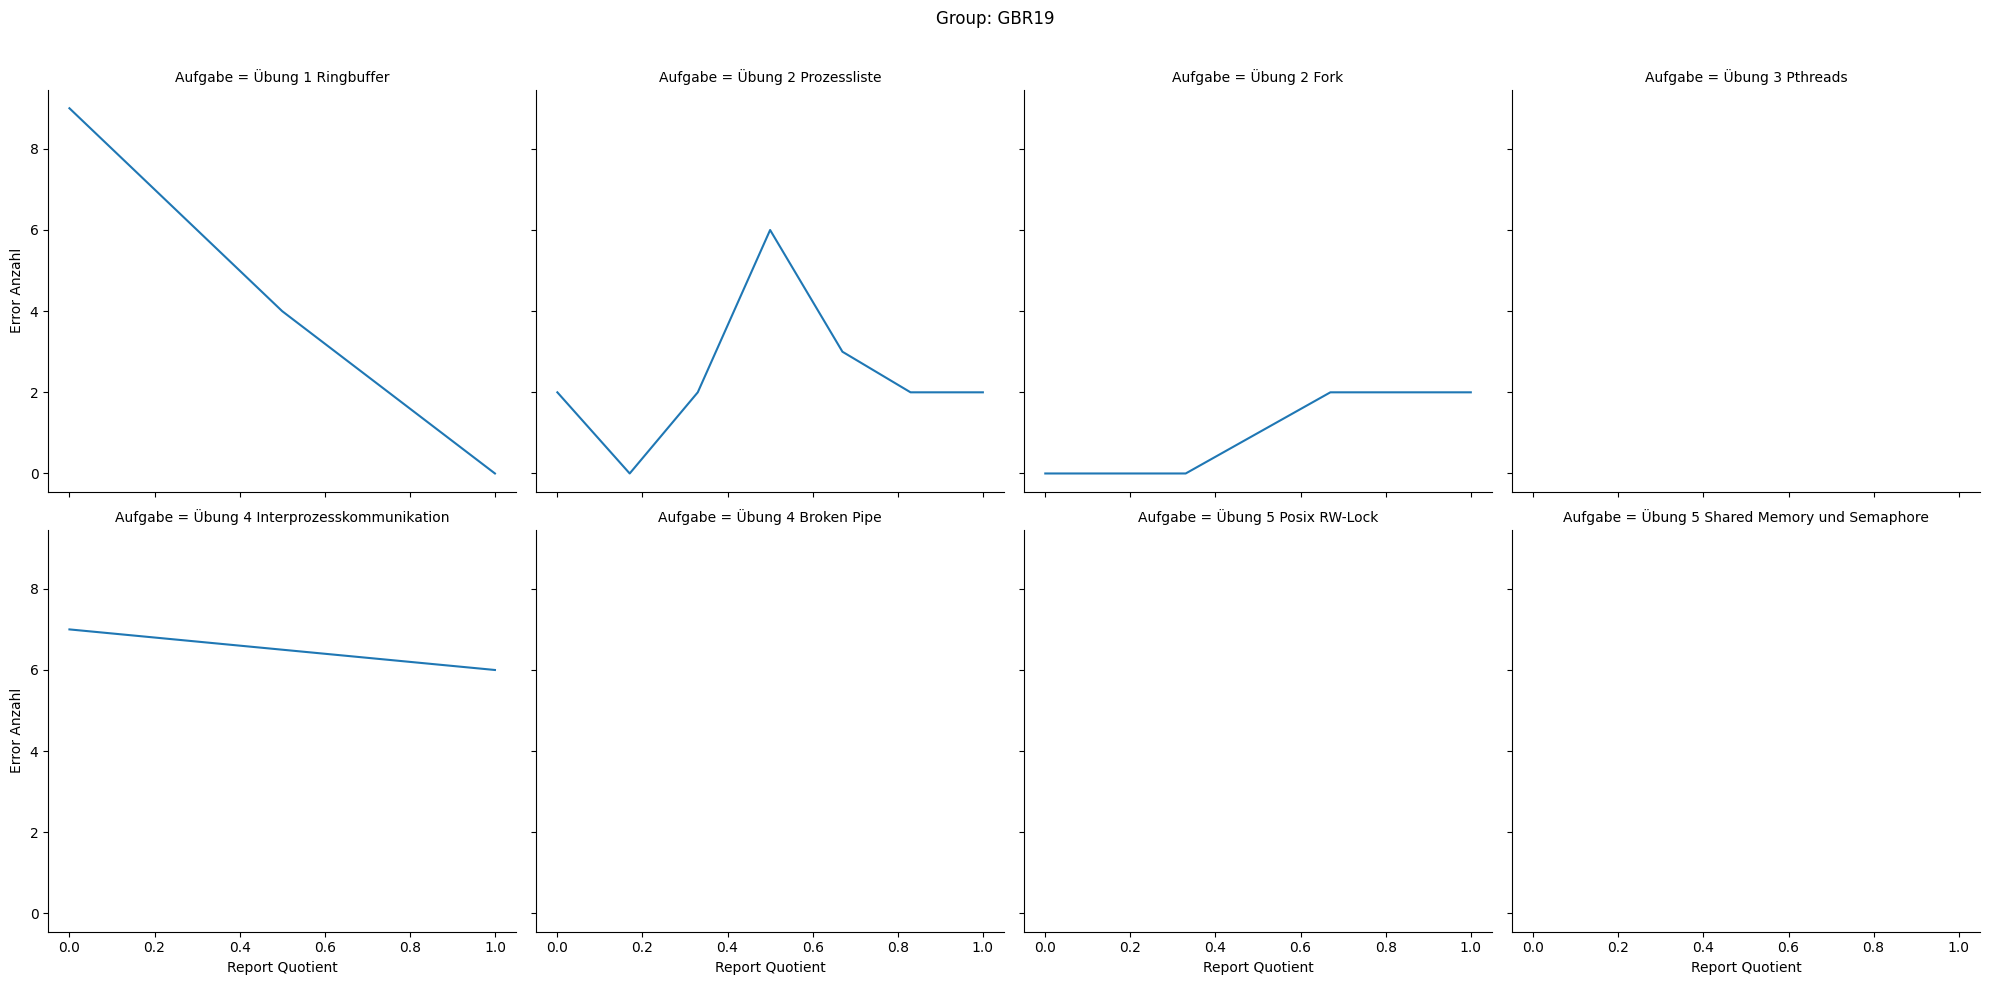

<Figure size 640x480 with 0 Axes>

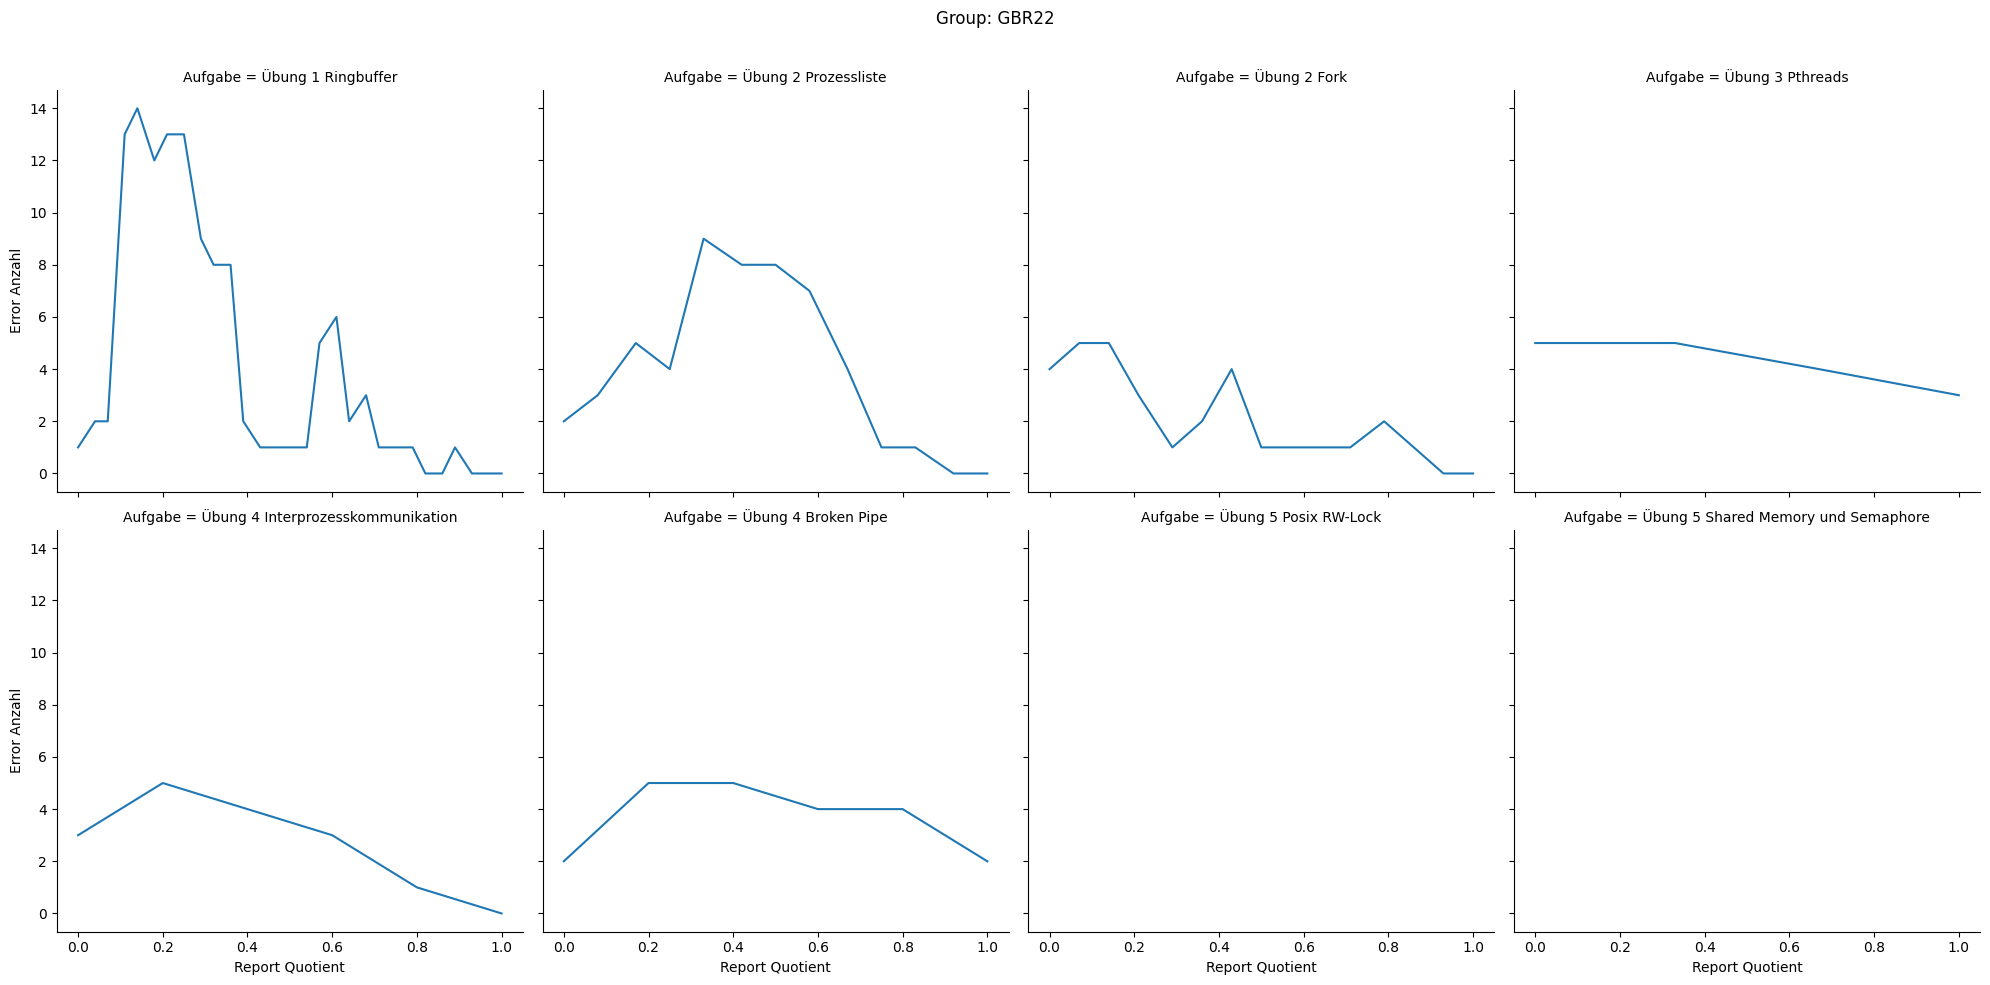

<Figure size 640x480 with 0 Axes>

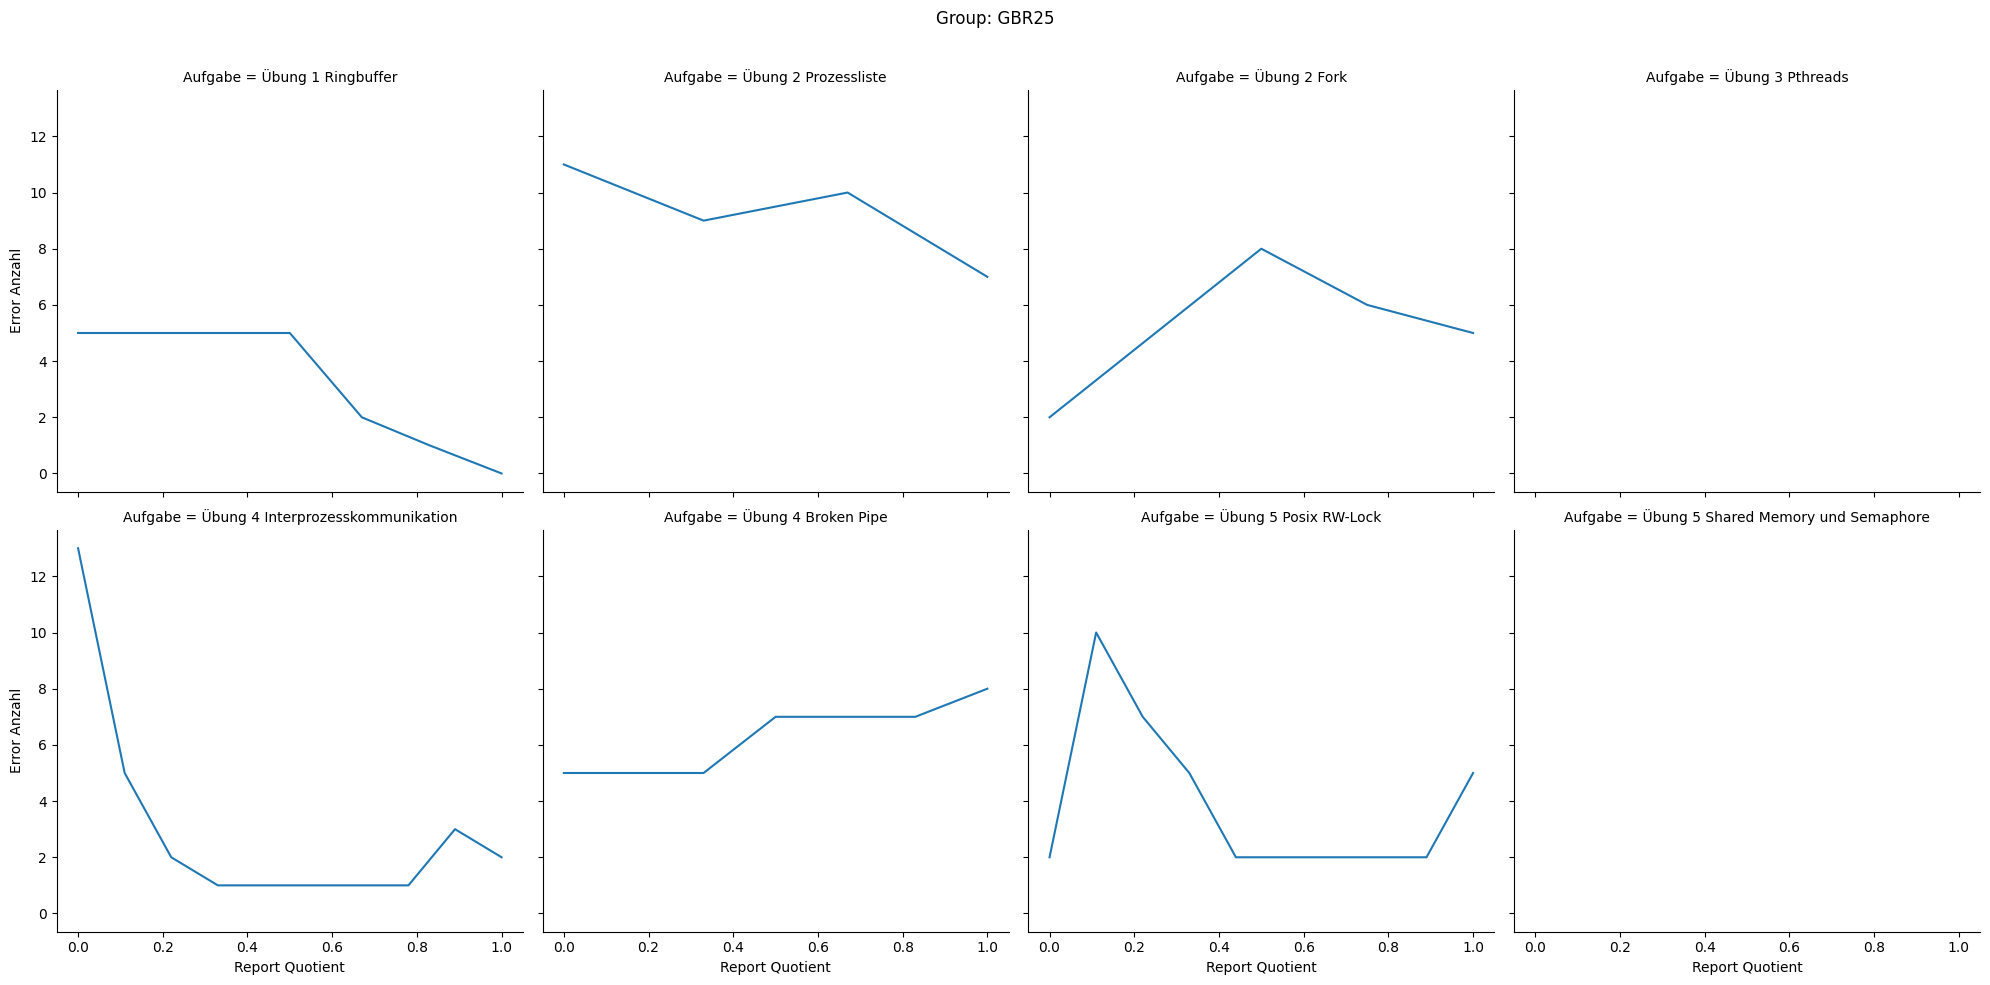

<Figure size 640x480 with 0 Axes>

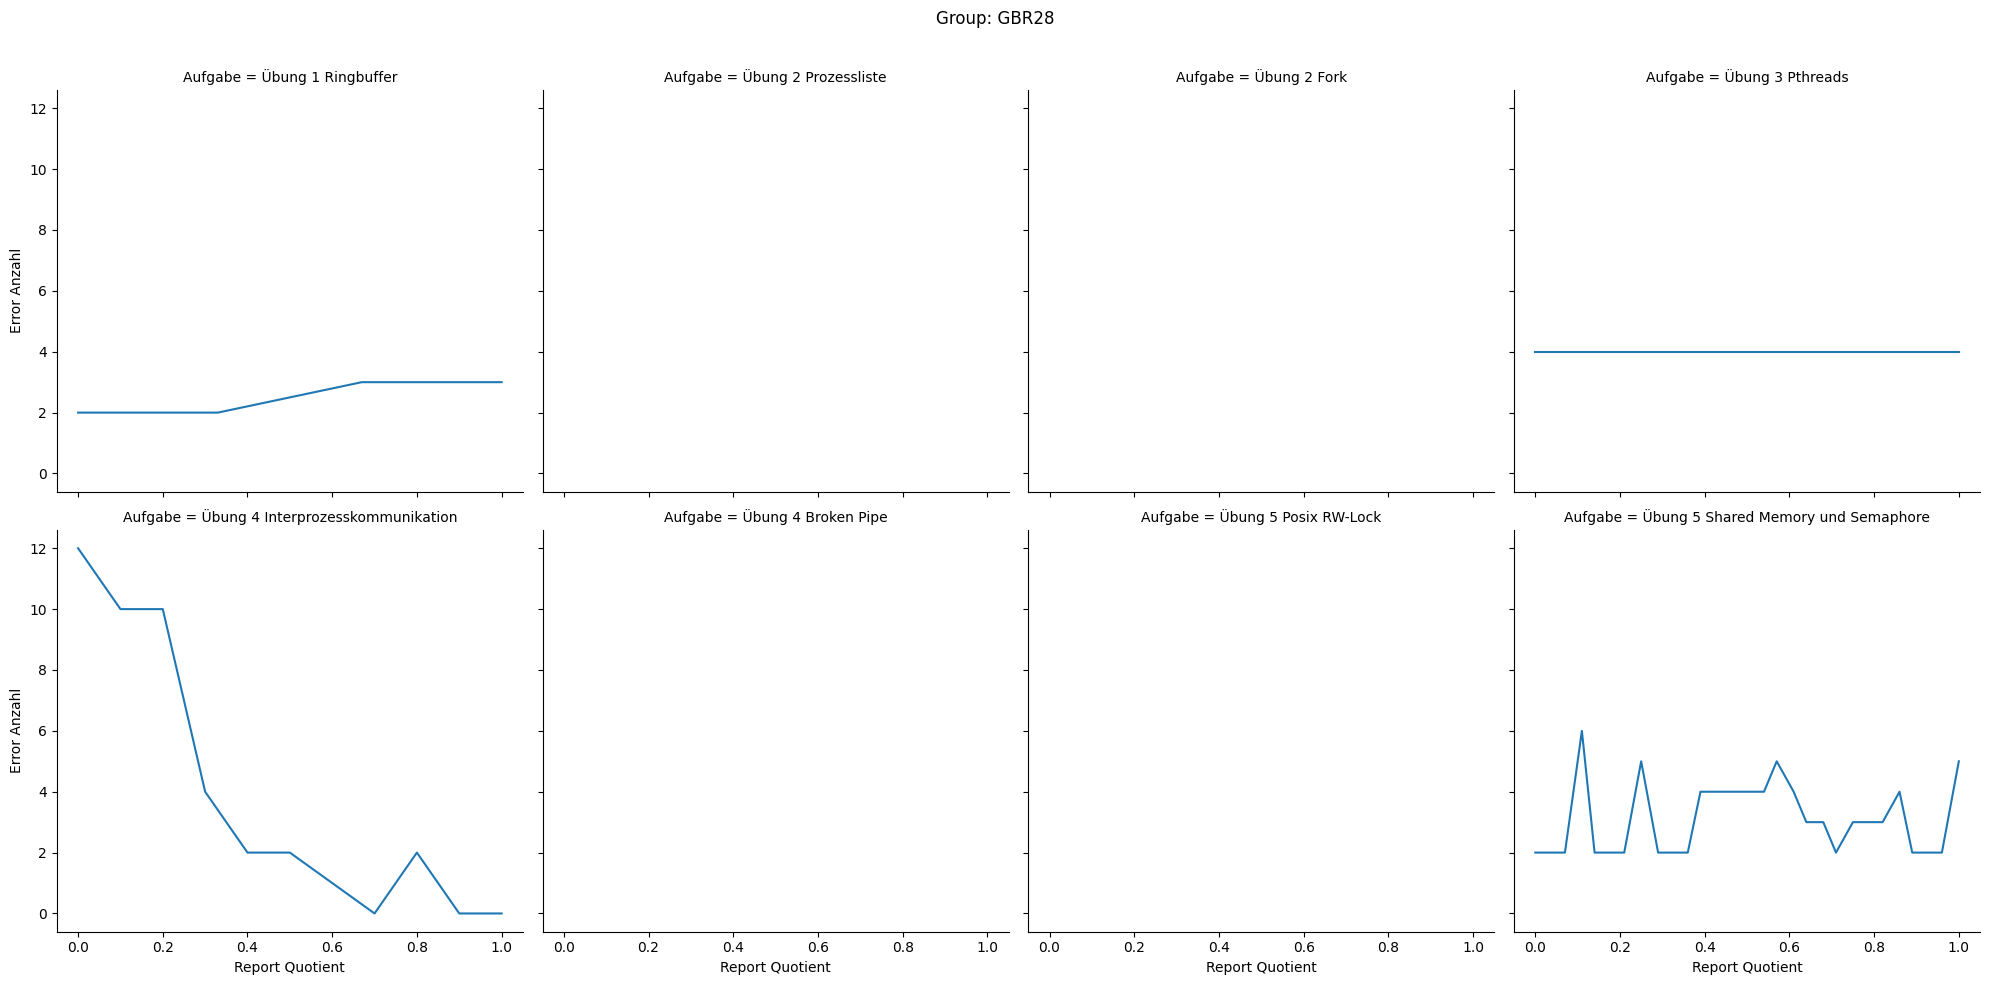

<Figure size 640x480 with 0 Axes>

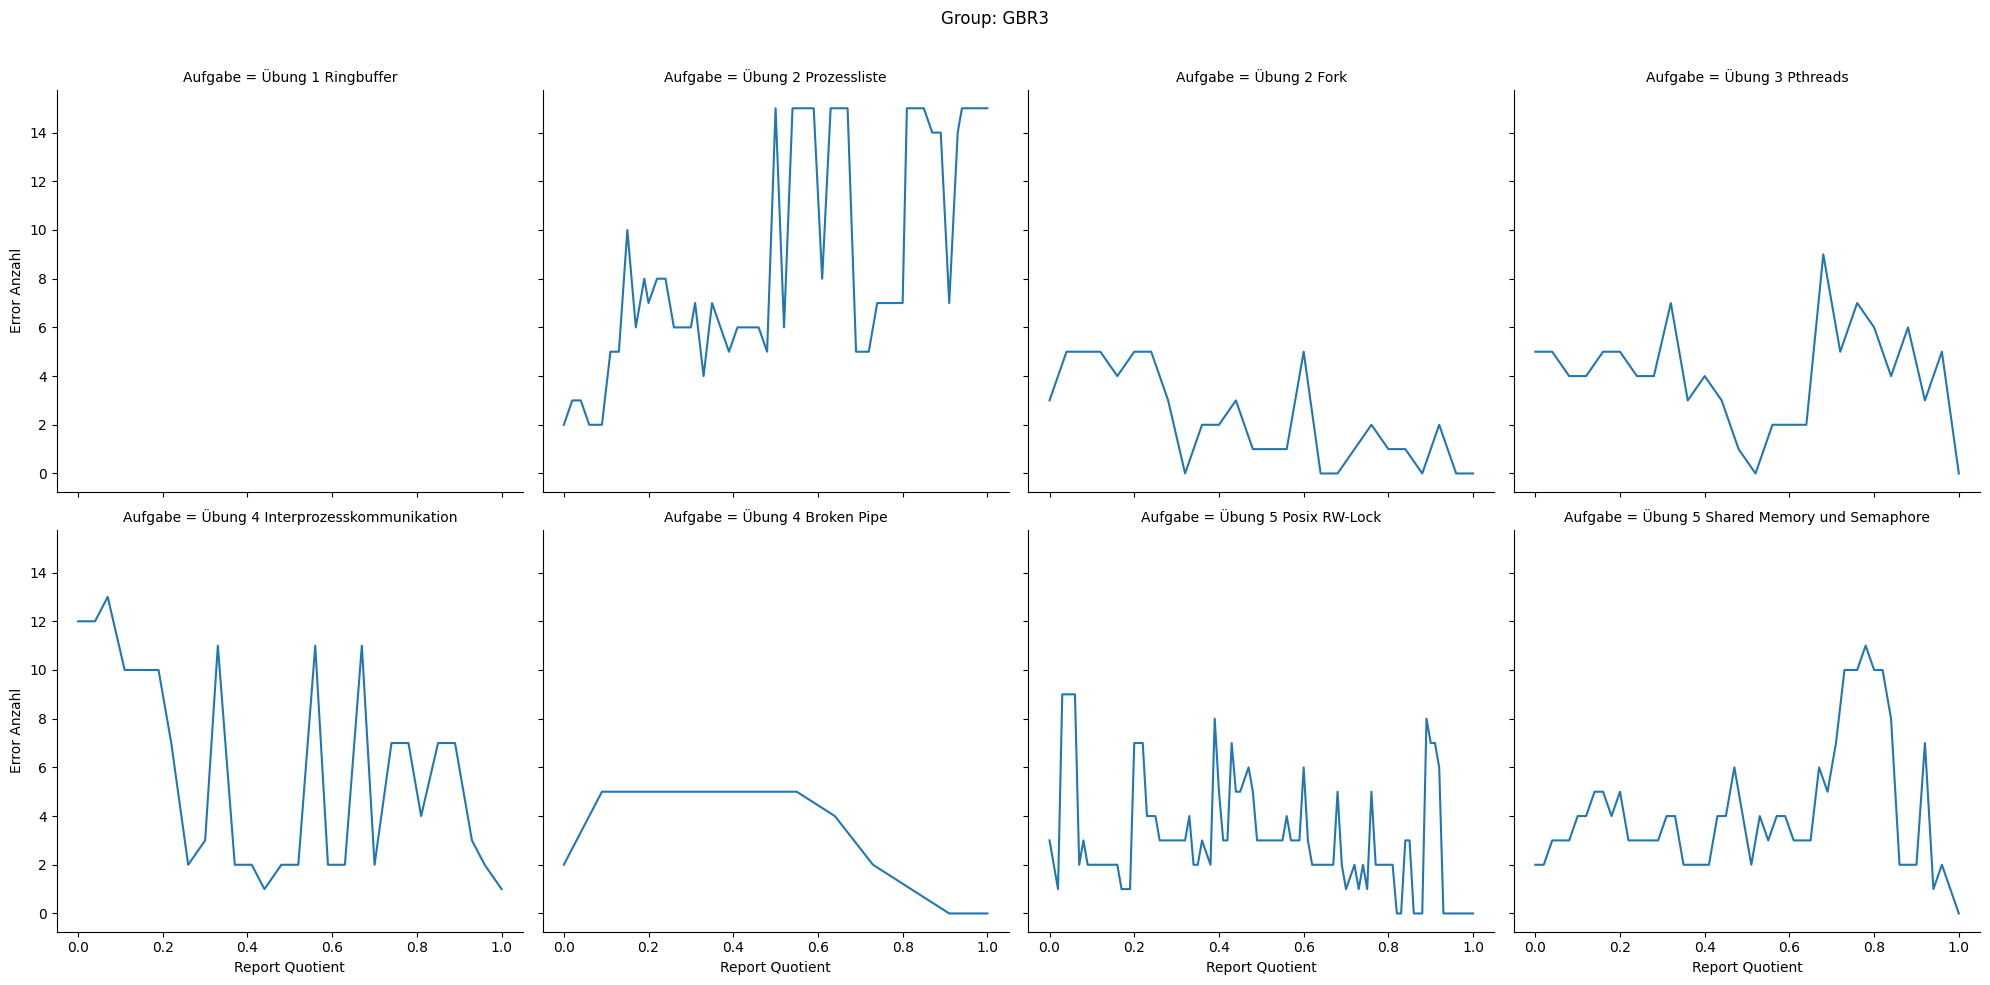

<Figure size 640x480 with 0 Axes>

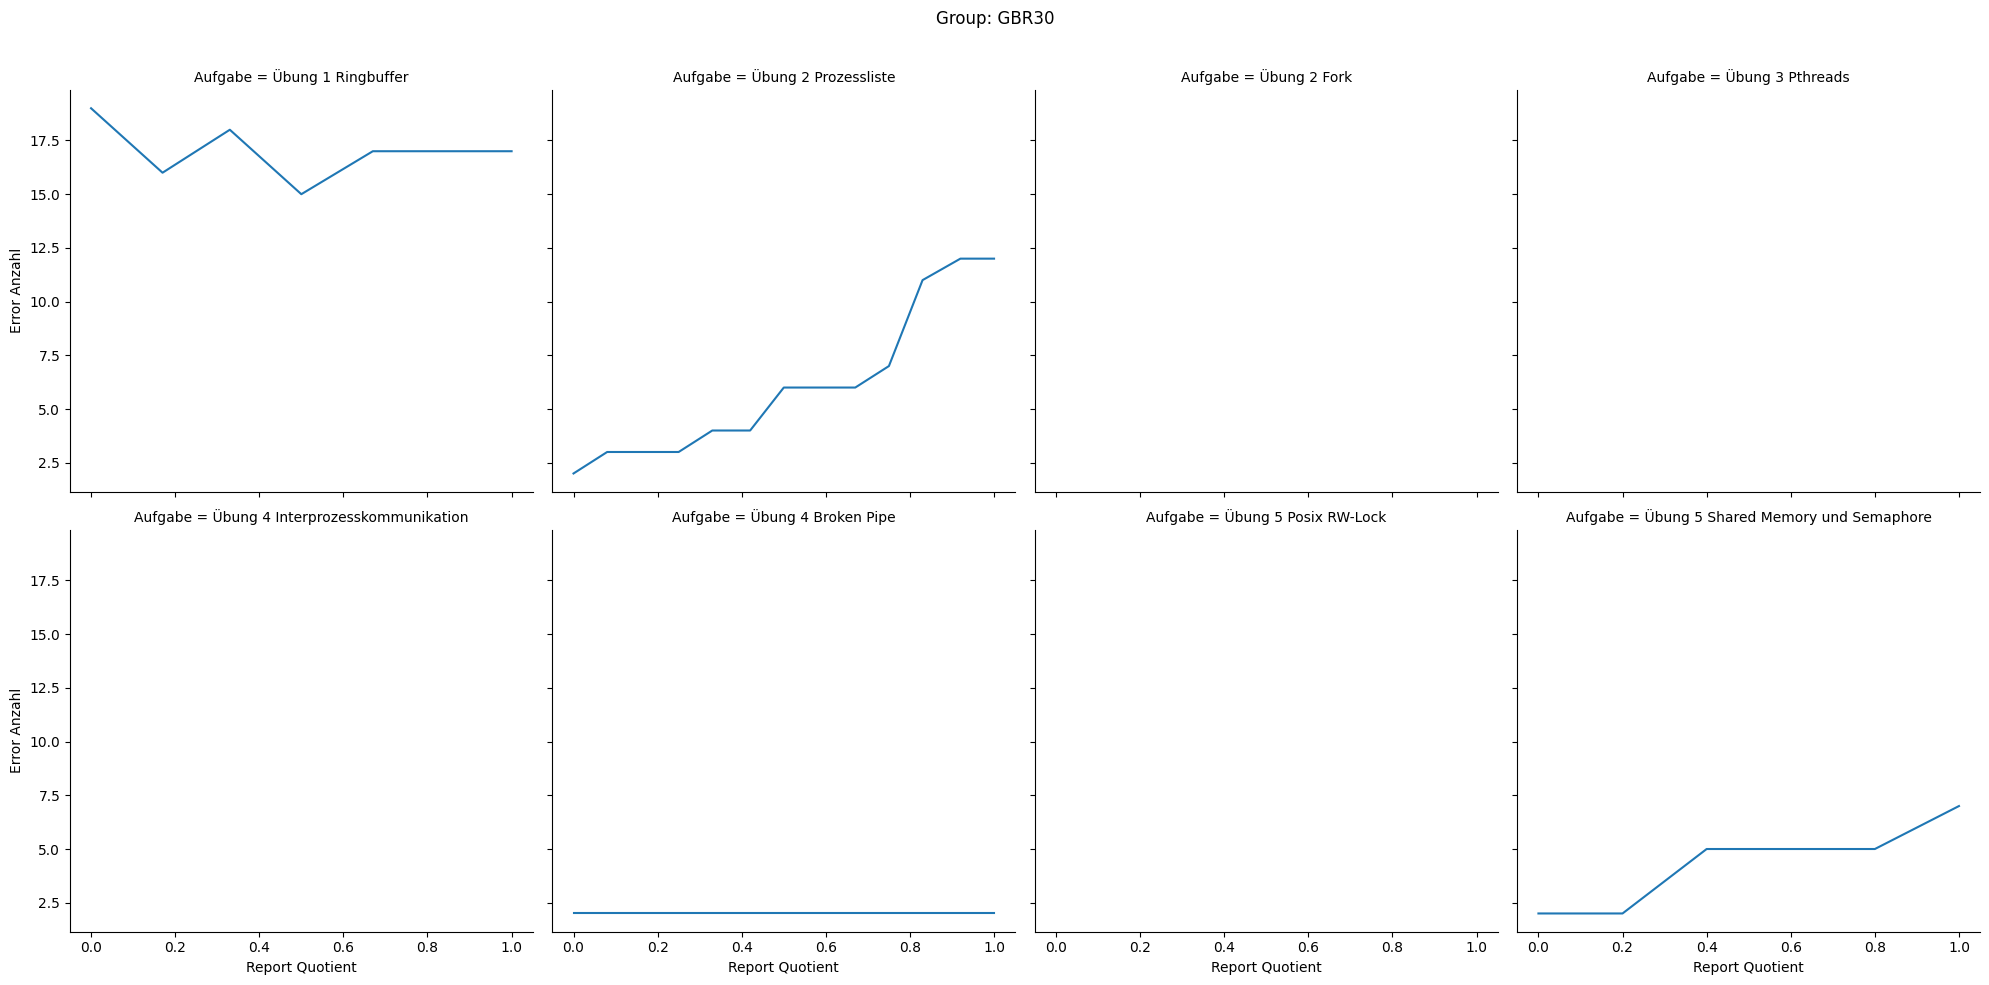

<Figure size 640x480 with 0 Axes>

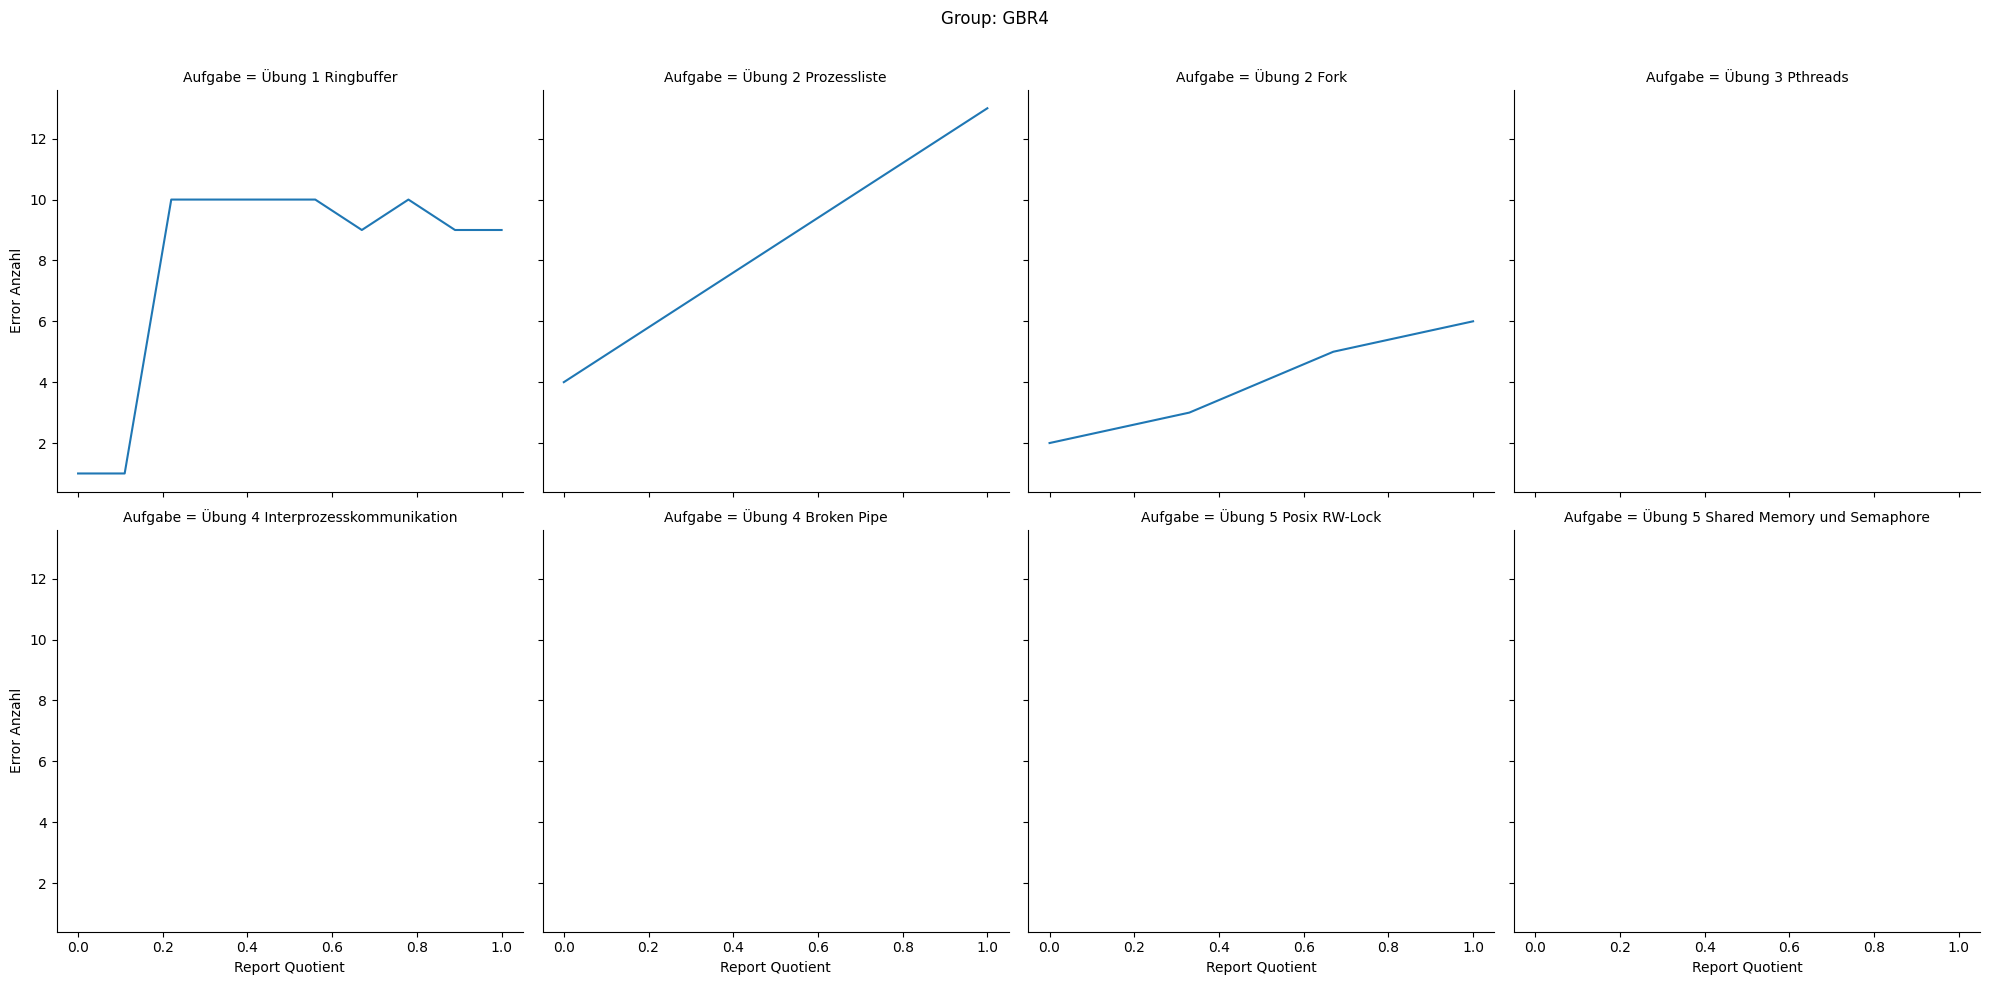

<Figure size 640x480 with 0 Axes>

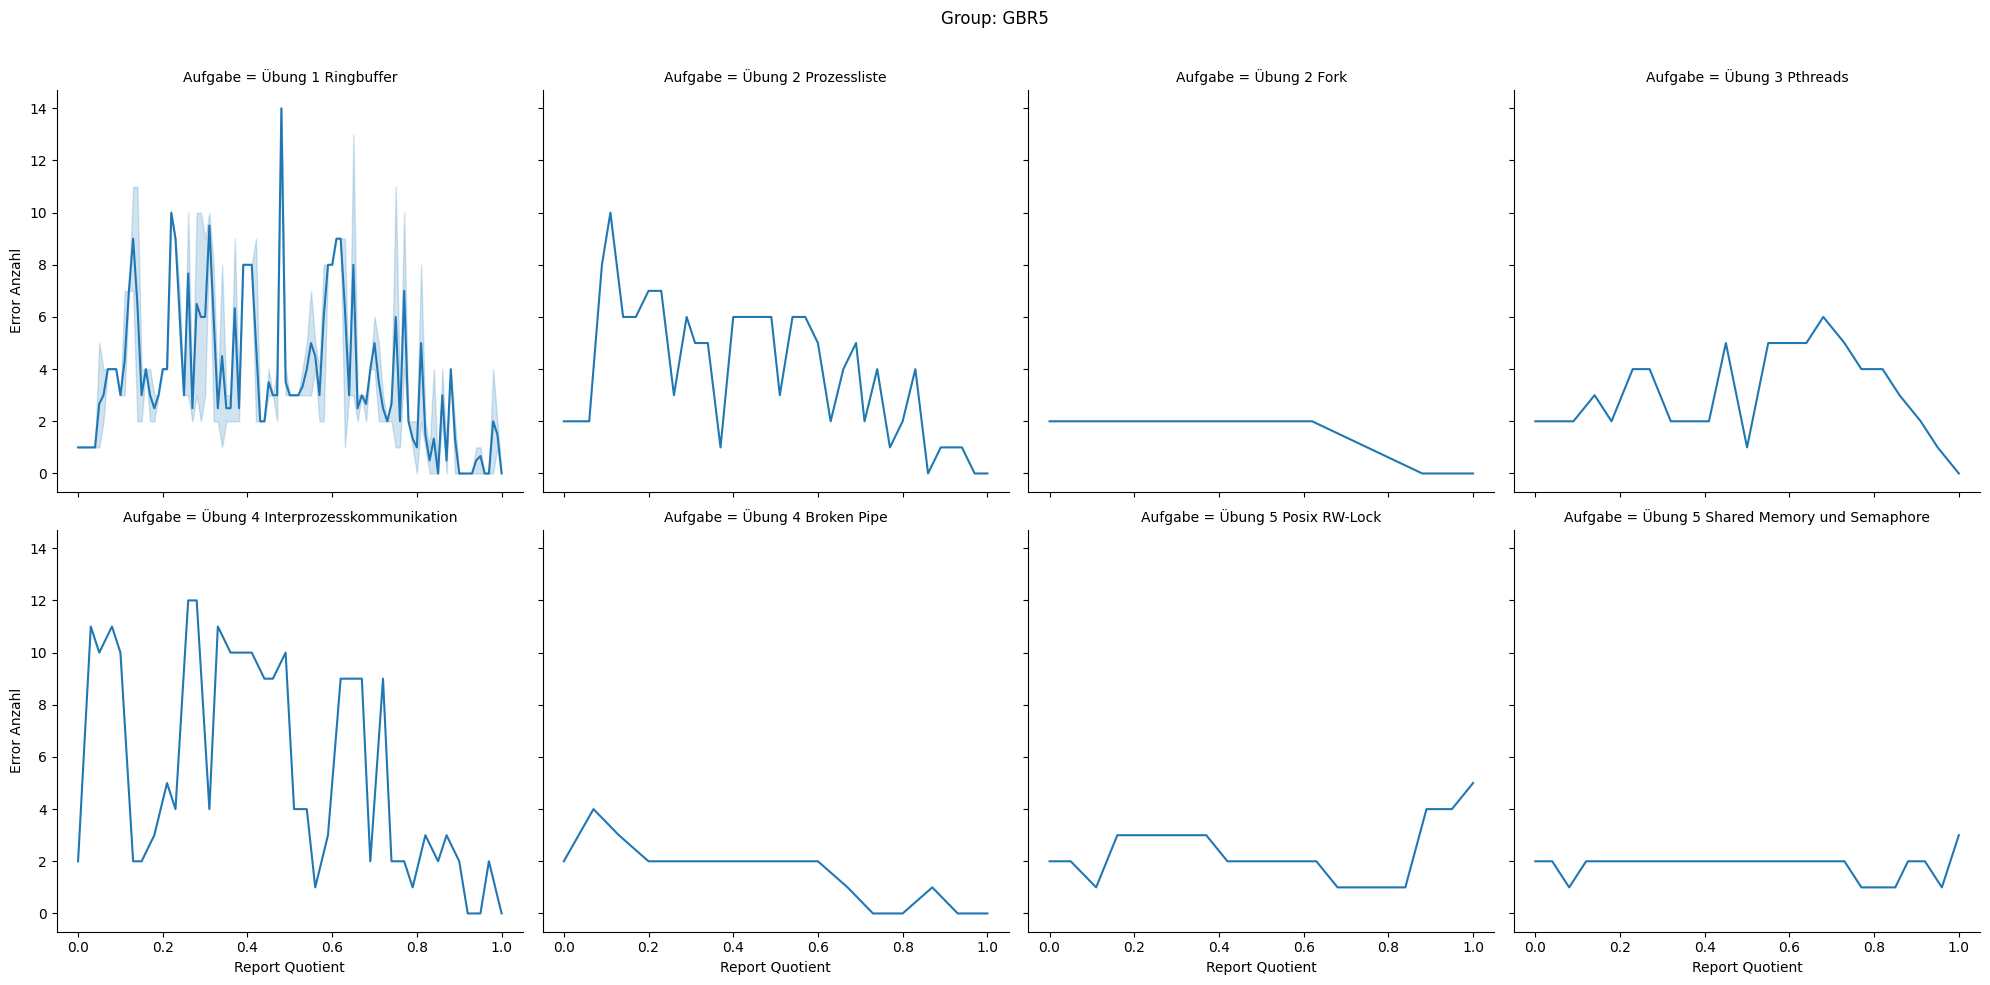

<Figure size 640x480 with 0 Axes>

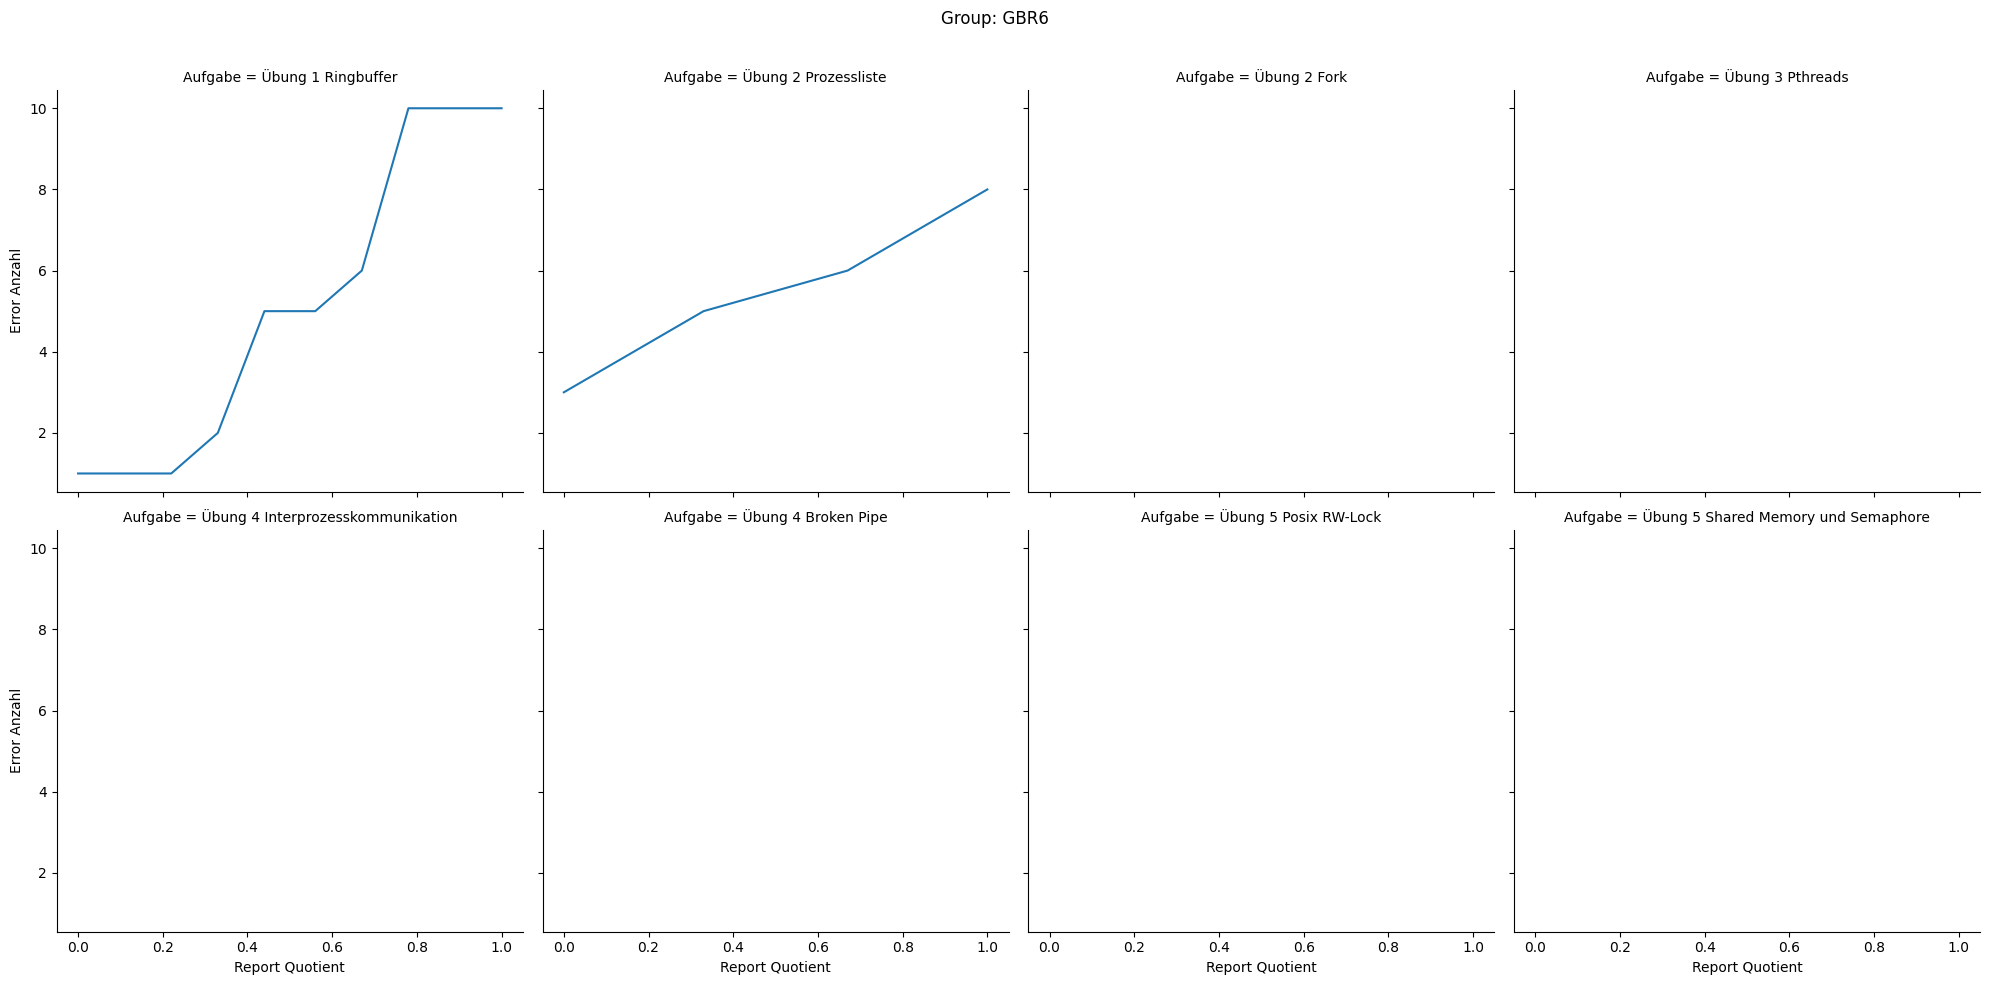

<Figure size 640x480 with 0 Axes>

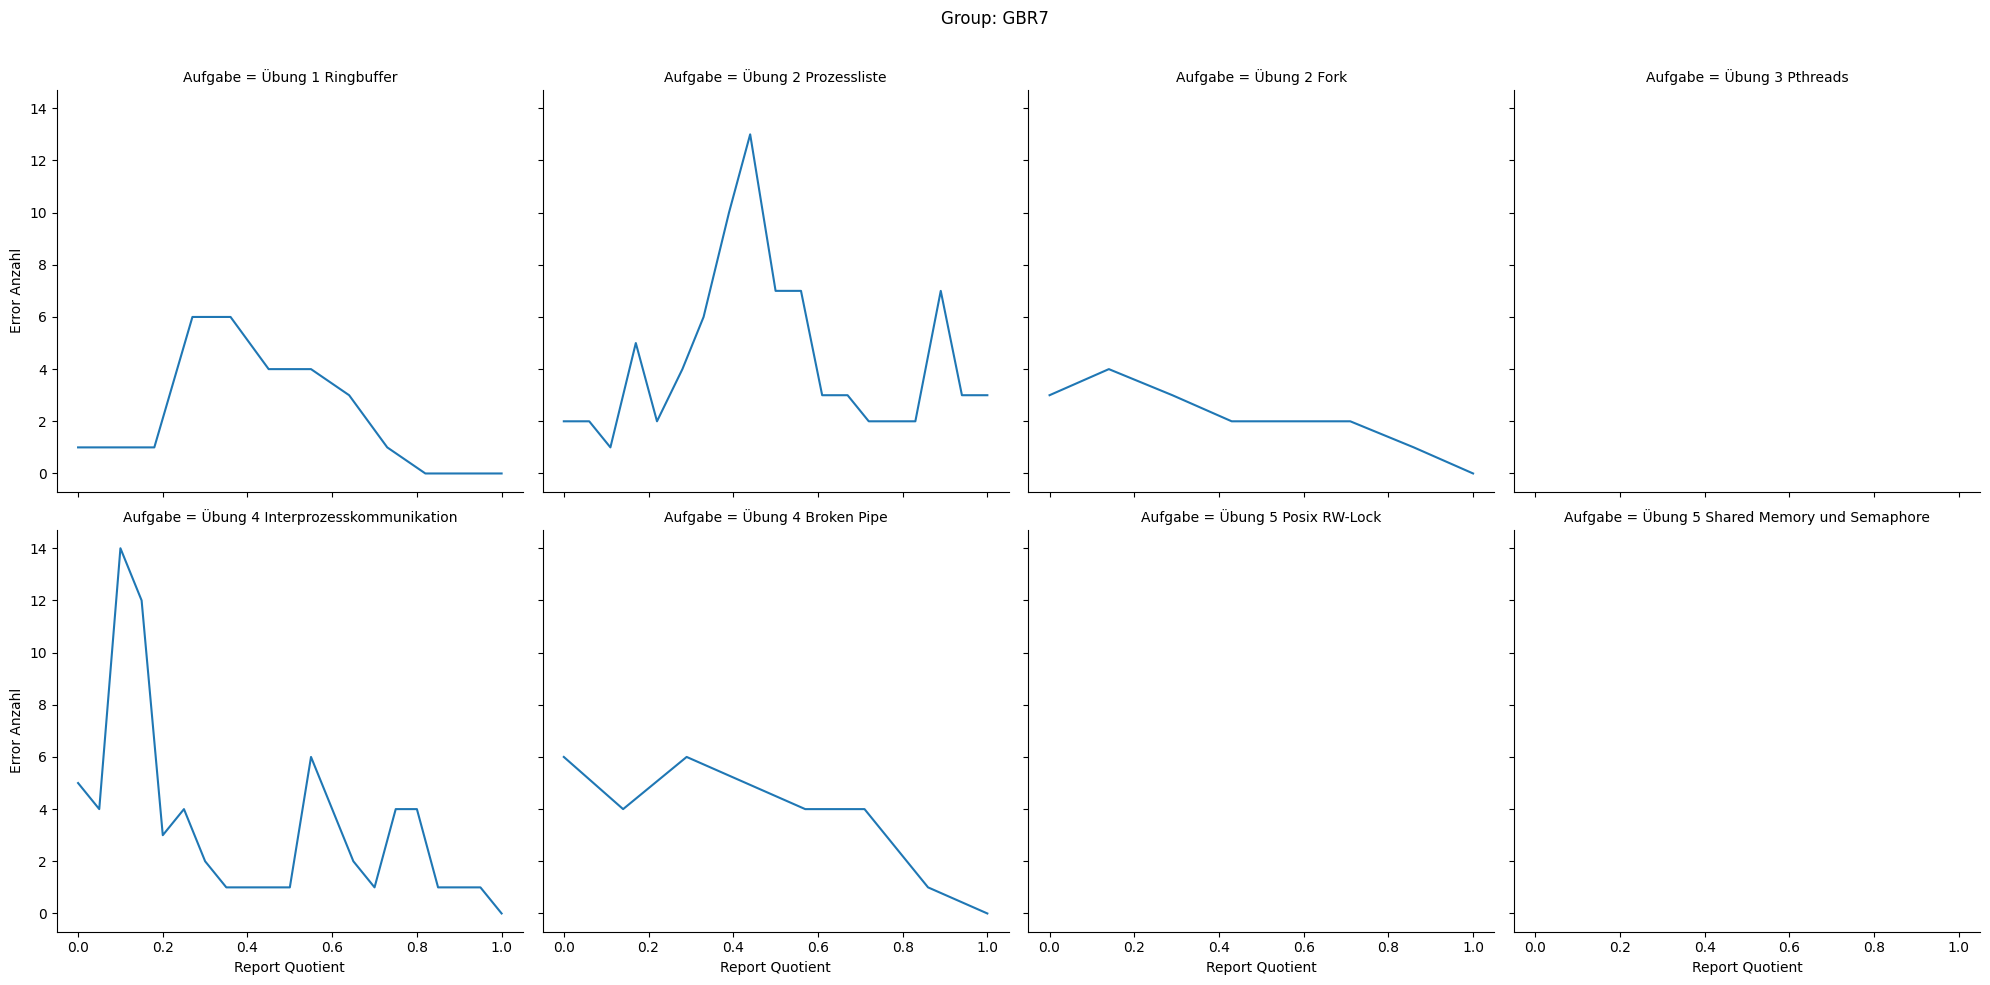

In [33]:
assignment_order = ['Übung 1 Ringbuffer', 'Übung 2 Prozessliste', 'Übung 2 Fork', 'Übung 3 Pthreads', 'Übung 4 Interprozesskommunikation', 'Übung 4 Broken Pipe', 'Übung 5 Posix RW-Lock', 'Übung 5 Shared Memory und Semaphore']
for group in df3.groupby('Gruppe'):
    plt.figure()
    sns.relplot(
        data=group[1], x='Report Quotient', y='Error Anzahl', col='Aufgabe', col_order=assignment_order, kind='line', col_wrap=4
    )
    plt.suptitle(f"Group: {group[0]}")
    plt.subplots_adjust(top=0.9)
    plt.show()